# Изучение закономерностей, определяющих успешность игр

## 1. Обзор данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

### 1.1 Функции <a id="1.1"></a>

#### 1.1.1 Функция для первичного анализа <a id="1.1.1"></a>

In [2]:
def first_rev(df):
    print('info')
    display(df.info(memory_usage='deep'))
    print('describe')
    display(df.describe().T.round(3))
    print('head')
    display(df.head())
    print('duplicated')
    display(df.duplicated().sum())

### 1.2 Данные

In [3]:
df = pd.read_csv(r"C:\Users\csvic\Desktop\data analysis\Я.Практикум\Модуль 1\Проекты\5. Сборный проект _ games.csv")

In [4]:
first_rev(df)

info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 5.6 MB


None

describe


,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.485,5.877,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263,0.814,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145,0.503,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.078,0.309,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047,0.187,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.968,13.938,13.0,60.0,71.00,79.00,98.00


head


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


duplicated


0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### 1.3 Вывод

Согласно документации таблица содержит данные:
* `Name` — название игры,
* `Platform` — платформа,
* `Year_of_Release` — год выпуска,
* `Genre` — жанр игры,
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий),
* `EU_sales` — продажи в Европе (миллионы проданных копий),
* `JP_sales` — продажи в Японии (миллионы проданных копий),
* `Other_sales` — продажи в других странах (миллионы проданных копий),
* `Critic_Score` — оценка критиков (максимум 100),
* `User_Score` — оценка пользователей (максимум 10),
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Данные за 2016 год могут быть неполными.

## 2. Предобработка данных

### 2.1 Стиль заголовков
Проверка нарушений стиля заголовков.

In [6]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [7]:
df.columns = df.columns.str.lower()

In [8]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### 2.1.1 Вывод
Изменили стиль заголовков (верхний регистр на нижний).

### 2.2 Пропуски значений

In [9]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [10]:
df.isna().mean().round(2)

name               0.00
platform           0.00
year_of_release    0.02
genre              0.00
na_sales           0.00
eu_sales           0.00
jp_sales           0.00
other_sales        0.00
critic_score       0.51
user_score         0.40
rating             0.40
dtype: float64

In [11]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [12]:
df[df['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [13]:
df = df.dropna(subset=['name', 'genre']).reset_index(drop=True)

In [14]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [15]:
df[df['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16709,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16710,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [16]:
df[df['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16709,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16710,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [17]:
df[df['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16709,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16710,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [18]:
columns_to_replace = [
    'year_of_release',
    'critic_score',
    'user_score'
]
for columns in columns_to_replace:
    df[columns] = df[columns].fillna(0)

In [19]:
df['rating'] = df['rating'].fillna('unknown')

In [20]:
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

#### 2.2.1 Вывод

* Пропуски значений в столбце Год выпуска (`year_of_release`) считаем несущественными, так как их 2% от выборки.
* Пропуски значений в столбцах Название (`name`) и Жанр (`genre`) удалены, это всего 2 игры.
* Пропуски в Оценке критиков (`critic_score`) и Оценке пользователей (`user_score`) заменили на 0, так как это количественные значения.
* Пропуски в Рейтинге (`rating`) заменили на 'unknown', так как это категориальные значения.

Обратиться к разработчикам и уточнить причины пропусков данных в столбцах Оценка критиков (`critic_score`), Оценка пользователей (`user_score`) и Рейтинг (`rating`), так как их значительное количество (от 40 до 50 процентов для оценок и рейтинга). Скорее всего, этих данных просто не было в открытых источниках (возможно это старые игры, которые не стали популярны, и данные о них не собраны, либо новые игры, данных о которых еще нет).

### 2.3 Тип данных
У части столбцов можно изменить тип данных для удобства и скорости анализа.

In [21]:
df['year_of_release'] = df['year_of_release'].astype(np.uint16, errors='ignore')

In [22]:
columns_to_replace = [
    'na_sales',
    'eu_sales',
    'jp_sales',
    'other_sales',
    'critic_score',
    'user_score'
]
for columns in columns_to_replace:
    df[columns] = df[columns].astype(np.float16, errors='ignore')

In [23]:
df.select_dtypes(include=['object']).copy().describe().T

,count,unique,top,freq
name,16713,11559,Need for Speed: Most Wanted,12
platform,16713,31,PS2,2161
genre,16713,12,Action,3369
user_score,16713,97,0,6699
rating,16713,9,unknown,6764


In [24]:
# проверка значений столбца `user_score`, так как не изменился тип данных с object на float
df['user_score'].unique()

array(['8', 0, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [25]:
df[df['user_score'] == "tbd"]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.449219,2.589844,0.0,0.660156,0.0,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.080078,1.349609,0.0,0.540039,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.509766,1.030273,0.0,0.270020,0.0,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.650391,0.569824,0.0,0.199951,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,0,Adventure,2.150391,0.180054,0.0,0.070007,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16693,Planet Monsters,GBA,2001,Action,0.010002,0.000000,0.0,0.000000,67.0,tbd,E
16695,Bust-A-Move 3000,GC,2003,Puzzle,0.010002,0.000000,0.0,0.000000,53.0,tbd,E
16696,Mega Brain Boost,DS,2008,Puzzle,0.010002,0.000000,0.0,0.000000,48.0,tbd,E
16702,Plushees,DS,2008,Simulation,0.010002,0.000000,0.0,0.000000,0.0,tbd,E


In [26]:
# заменим значение "tbd" в данных на 0
# так как аббревиатура TBD используется,
# если какая-то информация еще не определена или решение по вопросу не принято
df['user_score'] = df['user_score'].replace('tbd', 0)

In [27]:
df['user_score'] = df['user_score'].astype(np.float16, errors='ignore')

In [28]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  uint16 
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float16
 5   eu_sales         16713 non-null  float16
 6   jp_sales         16713 non-null  float16
 7   other_sales      16713 non-null  float16
 8   critic_score     16713 non-null  float16
 9   user_score       16713 non-null  float16
 10  rating           16713 non-null  object 
dtypes: float16(6), object(4), uint16(1)
memory usage: 4.5 MB


#### 2.3.1 Вывод

Изменили типы данных для датафреймов.

Обнаружили в стобце Оценка пользователя (`user_score`) значение "tdb" в 2424 строках. Заменили на 0, так как TBD — аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. В данном контексте значит, что на момент выгрузки данных информации об оценке еще не было.

### 2.4 Проверка на нормальность
Проверка неявных дубликатов и выбивающихся значений.

In [29]:
sorted(df['platform'].unique())

['2600',
 '3DO',
 '3DS',
 'DC',
 'DS',
 'GB',
 'GBA',
 'GC',
 'GEN',
 'GG',
 'N64',
 'NES',
 'NG',
 'PC',
 'PCFX',
 'PS',
 'PS2',
 'PS3',
 'PS4',
 'PSP',
 'PSV',
 'SAT',
 'SCD',
 'SNES',
 'TG16',
 'WS',
 'Wii',
 'WiiU',
 'X360',
 'XB',
 'XOne']

In [30]:
sorted(df['genre'].unique())

['Action',
 'Adventure',
 'Fighting',
 'Misc',
 'Platform',
 'Puzzle',
 'Racing',
 'Role-Playing',
 'Shooter',
 'Simulation',
 'Sports',
 'Strategy']

In [31]:
sorted(df['rating'].unique())

['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', 'unknown']

#### 2.4.1 Вывод

Выбивающихся значений и неявных дубликатов не обнаружено.

## 3 Добавление данных

### 3.1 Суммарные продажи во всех регионах

In [32]:
df['all_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [33]:
df['all_sales'].describe()

count    16713.000000
mean         0.533203
std          1.547852
min          0.000000
25%          0.059998
50%          0.170044
75%          0.469971
max         82.500000
Name: all_sales, dtype: float64

In [34]:
df['na_sales'].sum() / df['all_sales'].sum()

0.4937

In [35]:
df['eu_sales'].sum() / df['all_sales'].sum()

0.272

In [36]:
df['jp_sales'].sum() / df['all_sales'].sum()

0.1456

In [37]:
df['other_sales'].sum() / df['all_sales'].sum()

0.08875

### 3.2 Вывод

Добавили столбец с суммарными продажами по всем регионам (`all_sales`).
А также рассчитали долю продаж региона от общемировых продаж:
1. Северная Америка — 49%
2. Европа — 27%
3. Япония — 15%
4. Другие регионы — 9%

## 4. Анализ данных

### 4.1 Анализ выпуска игр в разные годы

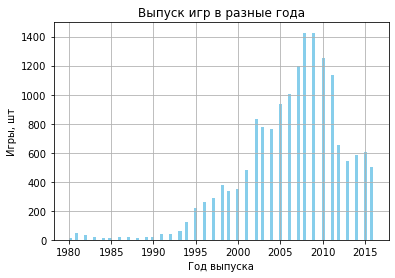

In [38]:
df.hist(column='year_of_release', color='skyblue', bins=100, range=(1980, 2016))
plt.xlabel('Год выпуска')
plt.ylabel('Игры, шт')
plt.title('Выпуск игр в разные года')
plt.show()

In [39]:
df[df['year_of_release'] != 0].pivot_table(index='year_of_release', values='name', aggfunc='count').sort_values(by='name', ascending=False)

,name
year_of_release,
2008,1427
2009,1426
2010,1255
2007,1197
2011,1136
2006,1006
2005,939
2002,829
2003,775


#### 4.1.1 Вывод

1. Резкий скачок в выпуске игр начался в 2002 году. Пик пришелся на период 2006-2011 годы.
2. Какой именно брать период для анализа продаж будет ясно после анализа платформ, так как какие-то платформы стали нерабочими или непопулярными.

**Предварительно планируем делать выборку от 2002 года**, но скорее всего нужно будет сужать период до 3-5 лет из-за быстрого развития технологий, в том числе игровых.

### 4.2 Анализ продаж по платформам

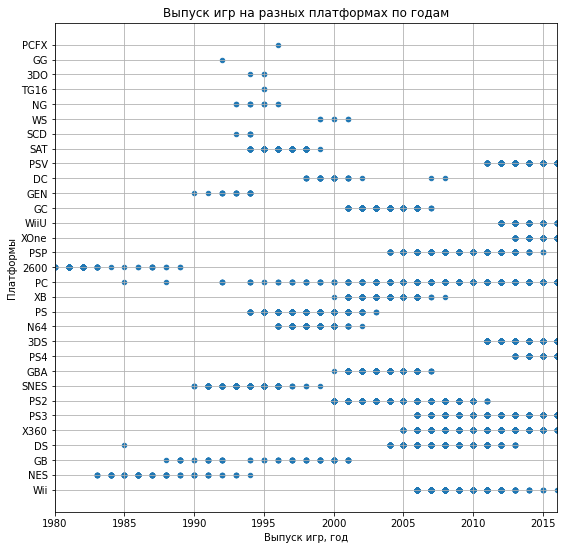

In [40]:
df.plot(x='year_of_release', y='platform', kind='scatter', grid=True, xlim=(1980, 2016), figsize=(9,9))
plt.xlabel('Выпуск игр, год')
plt.ylabel('Платформы')
plt.title('Выпуск игр на разных платформах по годам')
plt.show()

In [41]:
df.query('year_of_release == 1985 and platform == "DS"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
15955,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.020004,0.0,0.0,0.0,unknown,0.020004


In [42]:
df = df.query('index not in [15955]')

In [43]:
df.query('year_of_release == 1985 and platform == "PC"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
14468,Alter Ego,PC,1985,Simulation,0.0,0.029999,0.0,0.010002,59.0,5.800781,T,0.040009


In [44]:
df_platform_age = df.query('year_of_release != 0')
df_platform_age = df_platform_age.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max'])
df_platform_age.columns = ['min', 'max']
df_platform_age['period'] = df_platform_age['max'] - df_platform_age['min']
df_platform_age

,min,max,period
platform,,,
2600,1980,1989,9
3DO,1994,1995,1
3DS,2011,2016,5
DC,1998,2008,10
DS,2004,2013,9
GB,1988,2001,13
GBA,2000,2007,7
GC,2001,2007,6
GEN,1990,1994,4


In [45]:
df_platform_age['period'].describe().T

count    31.000000
mean      7.000000
std       5.899152
min       0.000000
25%       3.000000
50%       6.000000
75%      10.000000
max      31.000000
Name: period, dtype: float64

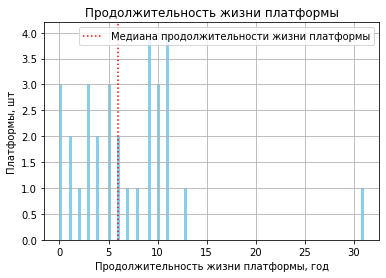

In [46]:
df_platform_age.hist(column='period', color='skyblue', bins=100)
plt.axvline(df_platform_age['period'].median(), color='red', linestyle='dotted', label='Медиана продолжительности жизни платформы')
plt.legend()
plt.xlabel('Продолжительность жизни платформы, год')
plt.ylabel('Платформы, шт')
plt.title('Продолжительность жизни платформы')
plt.show()

In [47]:
df_platform = df.pivot_table(index='platform', values='all_sales', aggfunc=['count', 'sum'])
df_platform.columns=['count', 'all_sales']
df_platform['sales_per_game'] = (df_platform['all_sales'] / df_platform['count']).round(2)
df_platform.sort_values(by='count', ascending=False)

,count,all_sales,sales_per_game
platform,,,
PS2,2161,1256.000000,0.58
DS,2150,806.000000,0.37
PS3,1331,939.500000,0.71
Wii,1320,907.500000,0.69
X360,1262,971.500000,0.77
PSP,1209,294.000000,0.24
PS,1197,731.000000,0.61
PC,974,259.500000,0.27
XB,824,257.750000,0.31


In [48]:
df_platform['count'].corr(df_platform['all_sales'])

0.9004027219050805

In [49]:
df_platform_2016 = df.pivot_table(index='platform', values='year_of_release', aggfunc='max').reset_index()
df_platform_2016 = df_platform_2016[df_platform_2016['year_of_release'] > 2015]
df_platform_2016['platform']

2      3DS
13      PC
17     PS3
18     PS4
20     PSV
26     Wii
27    WiiU
28    X360
30    XOne
Name: platform, dtype: object

In [50]:
df_platform = df_platform.query('platform in @df_platform_2016.platform')
df_platform.sort_values(by='count', ascending=False)

,count,all_sales,sales_per_game
platform,,,
PS3,1331,939.5000,0.71
Wii,1320,907.5000,0.69
X360,1262,971.5000,0.77
PC,974,259.5000,0.27
3DS,520,259.0000,0.50
PSV,430,54.0625,0.13
PS4,392,314.2500,0.80
XOne,247,159.2500,0.64
WiiU,147,82.1875,0.56


In [51]:
df_platform['count'].corr(df_platform['all_sales'])

0.9087645014373004

In [52]:
df_platform_2016 = df_platform_2016.query('platform not in "PSV"')

In [53]:
df_platform = df.query('platform in @df_platform_2016.platform')

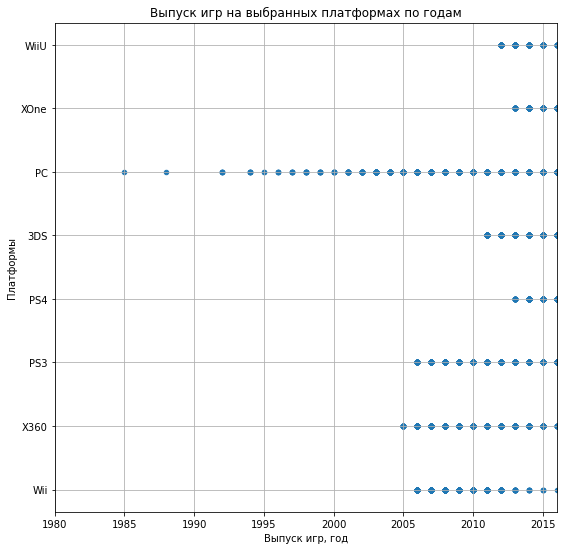

In [54]:
df_platform.plot(x='year_of_release', y='platform', kind='scatter', grid=True, xlim=(1980, 2016), figsize=(9,9))
plt.xlabel('Выпуск игр, год')
plt.ylabel('Платформы')
plt.title('Выпуск игр на выбранных платформах по годам')
plt.show()

In [55]:
df_platform = df_platform.query('year_of_release >= 2013')

In [56]:
df_platform.pivot_table(index=['platform', 'year_of_release'], values=['all_sales'], aggfunc=['sum', 'count', 'mean'])

sum     count      mean
                           all_sales all_sales all_sales
platform year_of_release                                
3DS      2013              56.562500        91  0.621582
         2014              43.781250        80  0.546875
         2015              27.781250        86  0.322998
         2016              15.132812        46  0.329102
PC       2013              12.375000        38  0.325684
         2014              13.281250        47  0.282471
         2015               8.515625        50  0.170410
         2016               5.250000        54  0.097229
PS3      2013             113.250000       126  0.898926
         2014              47.750000       108  0.442139
         2015              16.828125        73  0.230469
         2016               3.599609        38  0.094727
PS4      2013              25.984375        16  1.624023
         2014             100.000000        75  1.333008
         2015             118.875000       137  0.867676
         2016              69.250000       164  0.422363
Wii      2013               8.593750        12  0.715820
         2014               3.750000         6  0.625000
         2015               1.140625         4  0.285156
         2016               0.179932         1  0.179932
WiiU     2013              21.640625        42  0.515625
         2014              22.031250        31  0.710449
         2015              16.343750        28  0.583984
         2016               4.601562        14  0.328613
X360     2013              88.562500        75  1.180664
         2014              34.750000        63  0.551270
         2015              11.960938        35  0.341797
         2016               1.520508        13  0.116943
XOne     2013              18.953125        19  0.998047
         2014              54.062500        61  0.886230
         2015              60.125000        80  0.751465
         2016              26.156250        87  0.300537

In [57]:
df_platform_2016['platform']

2      3DS
13      PC
17     PS3
18     PS4
26     Wii
27    WiiU
28    X360
30    XOne
Name: platform, dtype: object

In [58]:
df_platform_2016 = df_platform_2016.query('platform not in ["Wii", "X360", "PS3"]')

In [59]:
df_platform = df_platform.query('platform in @df_platform_2016.platform')
df_platform

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.031250,5.859375,0.360107,2.380859,0.0,0.000000,unknown,14.632812
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.281250,4.191406,4.351562,0.779785,0.0,0.000000,unknown,14.601562
42,Grand Theft Auto V,PS4,2014,Action,3.960938,6.308594,0.379883,1.969727,97.0,8.296875,M,12.617188
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.351562,3.490234,3.099609,0.740234,0.0,0.000000,unknown,11.687500
77,FIFA 16,PS4,2015,Sports,1.120117,6.121094,0.059998,1.280273,82.0,4.300781,E,8.578125
...,...,...,...,...,...,...,...,...,...,...,...,...
16658,Prison Architect,XOne,2016,Action,0.010002,0.000000,0.000000,0.000000,74.0,6.699219,unknown,0.010002
16666,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,2014,Action,0.000000,0.000000,0.010002,0.000000,0.0,0.000000,unknown,0.010002
16670,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.010002,0.000000,0.000000,0.000000,0.0,0.000000,M,0.010002
16675,Aikatsu Stars! My Special Appeal,3DS,2016,Action,0.000000,0.000000,0.010002,0.000000,0.0,0.000000,unknown,0.010002


In [60]:
df_platform.shape[0] / df.shape[0]

0.07455720440402107

#### 4.2.1 Вывод

Рассмотрели выпуск платформ в разные годы, удалили 1 выброс (игра "Strongest Tokyo University Shogi DS" с платформой DS, но платформа DS вышла только в 2004 году).

**На основе первичного анализа выделили 9 платформ, для которых выпускали игры в 2016 году.**

Рассмотрели платформы с самым большим количество игр, общих продаж и среднего количество копий для 1 игры.

1. Платформы с самым большим средним количеством проданных копий за игру:
	* GB (2.61 млн) — выпуск игр до 2001 года, всего 98 игр,
	* NES (2.56 млн) — выпуск игр до 1994 года, всего 98 игр,
	* GEN (1.05 млн) — выпуск игр до 1994 года, всего 27 игр.

Можно сделать вывод, что это были 3 самые популярные платформы в период 90х и начало 2000х. Это относится к периоду с самым низким количеством выпущенных игр. Начиная с 2002 года как раз наблюдается резкий скачок в количестве выпускаемых игр. **Для анализа эти платформы не важны.**


2. Платформы с самыми большими продажами копий:
	* PS2 (1256 млн) — выпуск игр c 2000 до 2011, всего 2161 игра,
	* X360 (971.5 млн) — выпуск игр с 2005, всего 1262 игры,
	* PS3 (939.5 млн) — выпуск игр с 2006, всего 1331 игра,
	* Wii (907.5 млн) — выпуск игр с 2006, всего 1320 игр,
	* DS (806 млн) — выпуск игр c 2004 до 2014, всего 2151 игра, а также удалили строку с некорректными данными о игре, выпущенной на DS для Японии в 1985 году,
	* PS (731 млн) — выпуск игр с 1994 до 2003, всего 1197 игр.

Из 5 платформ с самыми большими продажами копий **мы будем рассматривать только X360, PS3, Wii**. Платформы PS2, DS и PS не рассматриваем, так как выпуск игр прекращен до 2016 года.


3. Платформы с самым большим количество выпущенных игр:
	* PS2 (2161 шт) — есть в п.2,
    * DS (2150 шт) — есть в п.2,
    * PS3 (1331 шт) — есть в п.2,
    * Wii (1320 шт) — есть в п.2,
    * X360 (1262 шт) — есть в п.2,
    * PSP (1209 шт) — выпуск игр с 2004 до 2015, всего 294 млн проданных копий,
    * PS (1197 шт) — есть в п.2.
    
**Выявлена прямая связь между количеством выпущенных игр и общими продажами.**

**Создали датафрейм с данными только актуальных платформ за последние 3 года, куда вошло только 7% данных (1246 строк).** Причина создания именно такой выборки:
1. Нам не нужен анализ платформ, для которых больше не выпускают игры.
2. Мы не рассматриваем период более 3 лет, так как технологии быстро развиваются, и больший период может показать нам уже устаревшие данные.

**В рамках анализа рассматриваем 5 платформ:**
* 3DS — выпуск игр с 2011, всего 520 игр, 259 млн проданных копий.
* PC — выпуск игр с 1985, всего 974 игр, 259.5 млн проданных копий.
* PS4 — выпуск игр с 2013, всего 392 игры, 314.2 млн проданных копий.
* WiiU — выпуск игр с 2012, всего 147 игр, 82.2 млн проданных копий.
* XOne — выпуск игр с 2013, всего 247 игр, 159.2 млн проданных копий.

Подошли по параметрам, но были удалены из выборки:
* X360 — выпуск игр с 2005, всего 1262 игр, 971.5 млн проданных копий. Значительное снижение количества выпускаемых игр за 4 года. Удаление в пользу платформы XOne, где наблюдается стабильное увеличение показателей до 2015 года со скачком вниз в 2016.
* Wii — выпуск игр с 2006, всего 1320 игр, 907.5 млн проданных копий. Значительное снижение количества выпускаемых игр за 4 года. В 2016 году выпущена всего 1 игра.
* PS3 — выпуск игр с 2006, всего 1331 игра, 939.5 млн проданных копий. Значительное снижение количества выпускаемых игр за 4 года. Удаление в пользу платформы PS4, где наблюдается стабильное увеличение показателей до 2015 года со снижением по количеству проданных копий в 2016.
* PSV — выпуск игр с 2006, всего 430 игр, 54 млн проданных копий. Самые низкие показатели по выборке по среднему количеству проданных млн копий за игру и по суммарным продажам.

### 4.3 Анализ продаж актуального периода

#### 4.3.1 Платформы

В рамках анализа рассматриваем 5 платформ:

1. 3DS — выпуск игр с 2011, всего 520 игр, 259 млн проданных копий.
2. PC — выпуск игр с 1985, всего 974 игр, 259.5 млн проданных копий.
3. PS4 — выпуск игр с 2013, всего 392 игры, 314.2 млн проданных копий.
4. WiiU — выпуск игр с 2012, всего 147 игр, 82.2 млн проданных копий.
5. XOne — выпуск игр с 2013, всего 247 игр, 159.2 млн проданных копий.

In [61]:
df_platform.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.031250,5.859375,0.360107,2.380859,0.0,0.000000,unknown,14.632812
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.281250,4.191406,4.351562,0.779785,0.0,0.000000,unknown,14.601562
42,Grand Theft Auto V,PS4,2014,Action,3.960938,6.308594,0.379883,1.969727,97.0,8.296875,M,12.617188
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.351562,3.490234,3.099609,0.740234,0.0,0.000000,unknown,11.687500
77,FIFA 16,PS4,2015,Sports,1.120117,6.121094,0.059998,1.280273,82.0,4.300781,E,8.578125


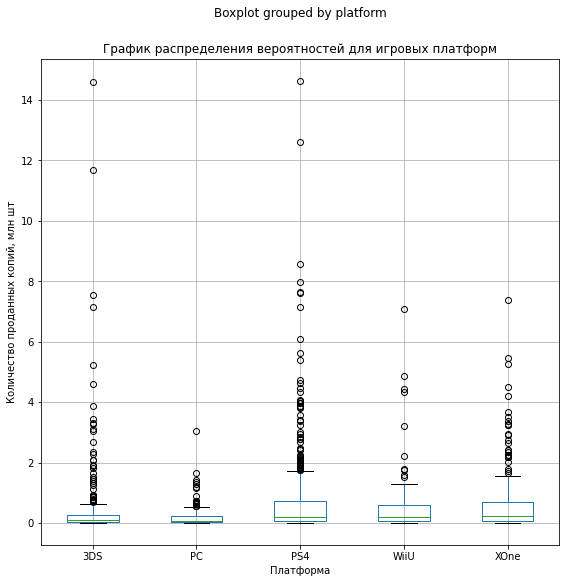

In [62]:
df_platform.boxplot(column='all_sales', by='platform', figsize=(9, 9))
plt.xlabel('Платформа')
plt.ylabel('Количество проданных копий, млн шт')
plt.title('График распределения вероятностей для игровых платформ')
plt.show()

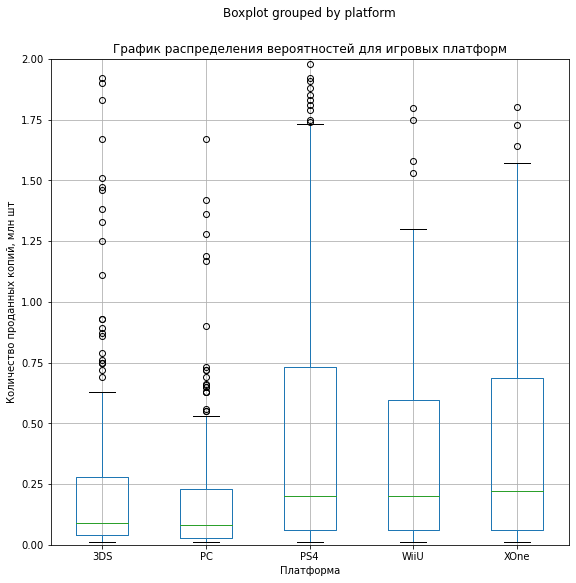

In [63]:
df_platform.boxplot(column='all_sales', by='platform', figsize=(9, 9))
plt.ylim(0, 2)
plt.xlabel('Платформа')
plt.ylabel('Количество проданных копий, млн шт')
plt.title('График распределения вероятностей для игровых платформ')
plt.show()

##### 4.3.1.1 Вывод

Боксплот по всем выбранным платформам показывает низкую плотность распределение и большое количество выборосов. Скорее всего, это связано с тем, что платформы выпускали игры в разное время, поэтому где-то успели больше продать, где-то меньше. Также наверняка для каждой платформы есть популярные игры-выбросы, на них надо будет обратить отдельное внимание.

##### 4.3.1.2 Платформа 3DS

In [64]:
df_platform.query('platform == "3DS"').sort_values(by='all_sales', ascending=False).head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.281250,4.191406,4.351562,0.779785,0.0,0.000000,unknown,14.601562
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.351562,3.490234,3.099609,0.740234,0.0,0.000000,unknown,11.687500
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.269531,1.370117,2.429688,0.479980,0.0,0.000000,unknown,7.550781
108,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.980469,1.450195,2.259766,0.449951,0.0,0.000000,unknown,7.136719
184,Tomodachi Life,3DS,2013,Simulation,0.970215,2.109375,1.900391,0.239990,0.0,0.000000,unknown,5.218750
235,Luigi's Mansion: Dark Moon,3DS,2013,Action,1.799805,1.389648,1.110352,0.290039,86.0,8.398438,E,4.589844
312,Monster Hunter 4 Ultimate,3DS,2014,Role-Playing,0.680176,0.479980,2.619141,0.109985,86.0,8.703125,T,3.888672
385,Monster Hunter 4,3DS,2013,Role-Playing,0.000000,0.000000,3.439453,0.000000,0.0,0.000000,unknown,3.439453
406,Monster Hunter X,3DS,2015,Action,0.270020,0.209961,2.789062,0.049988,0.0,0.000000,unknown,3.320312
412,Yokai Watch 2 Ganso/Honke,3DS,2014,Role-Playing,0.090027,0.000000,3.179688,0.010002,0.0,0.000000,unknown,3.279297


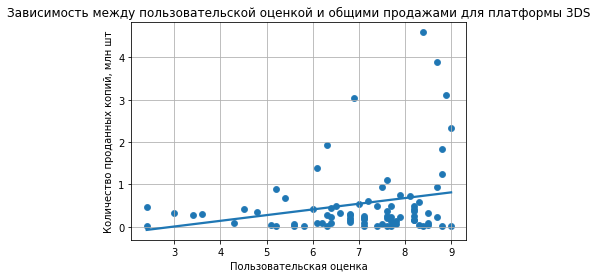

In [65]:
df_3DS = df_platform.query('platform == "3DS" and user_score != 0')
df_3DS.plot(x='user_score', y='all_sales', kind='scatter', grid=True)
sns.regplot(x=df_3DS['user_score'], y=df_3DS['all_sales'], ci=None)
plt.xlabel('Пользовательская оценка')
plt.ylabel('Количество проданных копий, млн шт')
plt.title('Зависимость между пользовательской оценкой и общими продажами для платформы 3DS')
plt.show()

In [66]:
df_3DS['user_score'].corr(df_3DS['all_sales'])

0.24137128751450102

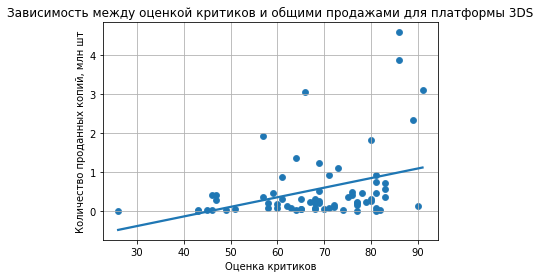

In [67]:
df_3DS = df_platform.query('platform == "3DS" and critic_score != 0')
df_3DS.plot(x='critic_score', y='all_sales', kind='scatter', grid=True)
sns.regplot(x=df_3DS['critic_score'], y=df_3DS['all_sales'], ci=None)
plt.xlabel('Оценка критиков')
plt.ylabel('Количество проданных копий, млн шт')
plt.title('Зависимость между оценкой критиков и общими продажами для платформы 3DS')
plt.show()

In [68]:
df_3DS['critic_score'].corr(df_3DS['all_sales'])

0.3570872271569983

###### 4.3.1.2.1 Вывод

* Между пользовательской оценкой и общими продажами очень слабая зависимость. График имеет более равномерное распределение значений по оси оценки, чем график оценки критиков.
* Между оценкой критиков и общими продажами слабая зависимость.
* В правой части есть несколько выборосов с высокими показателями оценок пользователей и критиков и разбросом в продажах.
* Самые продаваемые игры:
    * Pokemon X/Pokemon Y — 14.6 млн проданных копий без оценок пользователей и критиков.
    * Pokemon Omega Ruby/Pokemon Alpha Sapphire — 11.7 млн проданных копий без оценок пользователей и критиков.
    * Super Smash Bros. for Wii U and 3DS — 7.5 млн проданных копий без оценок пользователей и критиков.
    * Pokemon Sun/Moon — 7.1 млн проданных копий без оценок пользователей и критиков.

##### 4.3.1.3 Платформа PC

In [69]:
df_platform.query('platform == "PC"').sort_values(by='all_sales', ascending=False).head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
458,The Sims 4,PC,2014,Simulation,1.000000,1.820312,0.0,0.229980,70.0,3.900391,T,3.050781
1094,StarCraft II: Heart of the Swarm,PC,2013,Strategy,0.830078,0.660156,0.0,0.180054,86.0,7.898438,T,1.669922
1350,SimCity (2013),PC,2013,Simulation,0.479980,0.770020,0.0,0.170044,64.0,2.199219,E10+,1.419922
1436,Battlefield 4,PC,2013,Shooter,0.389893,0.870117,0.0,0.099976,81.0,6.000000,M,1.359375
1529,Fallout 4,PC,2015,Role-Playing,0.509766,0.669922,0.0,0.099976,84.0,5.398438,M,1.279297
1676,Farming Simulator 2015,PC,2014,Simulation,0.080017,1.040039,0.0,0.070007,0.0,0.000000,unknown,1.190430
1729,Grand Theft Auto V,PC,2015,Action,0.389893,0.689941,0.0,0.090027,96.0,7.898438,M,1.169922
2302,The Elder Scrolls Online,PC,2014,Role-Playing,0.320068,0.509766,0.0,0.070007,71.0,5.699219,M,0.899902
2783,Dragon Age: Inquisition,PC,2014,Role-Playing,0.330078,0.340088,0.0,0.059998,85.0,5.898438,M,0.729980
2828,Total War: Rome II,PC,2013,Strategy,0.119995,0.529785,0.0,0.070007,76.0,4.199219,T,0.719727


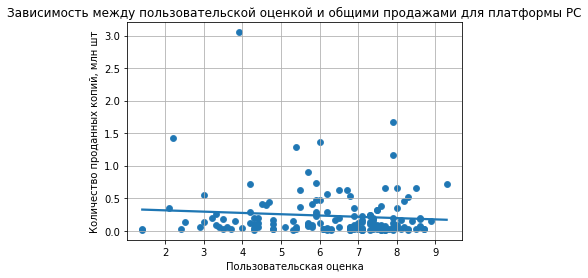

In [70]:
df_PC = df_platform.query('platform == "PC" and user_score != 0')
df_PC.plot(x='user_score', y='all_sales', kind='scatter', grid=True)
sns.regplot(x=df_PC['user_score'], y=df_PC['all_sales'], ci=None)
plt.xlabel('Пользовательская оценка')
plt.ylabel('Количество проданных копий, млн шт')
plt.title('Зависимость между пользовательской оценкой и общими продажами для платформы PC')
plt.show()

In [71]:
df_PC['user_score'].corr(df_PC['all_sales'])

-0.09401602388618537

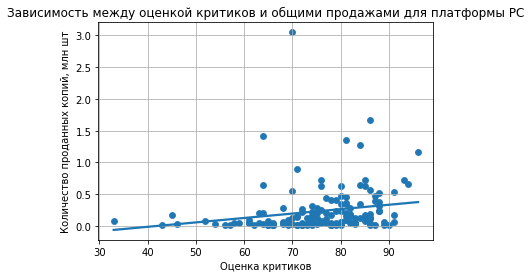

In [72]:
df_PC = df_platform.query('platform == "PC" and critic_score != 0')
df_PC.plot(x='critic_score', y='all_sales', kind='scatter', grid=True)
sns.regplot(x=df_PC['critic_score'], y=df_PC['all_sales'], ci=None)
plt.xlabel('Оценка критиков')
plt.ylabel('Количество проданных копий, млн шт')
plt.title('Зависимость между оценкой критиков и общими продажами для платформы PC')
plt.show()

In [73]:
df_PC['critic_score'].corr(df_PC['all_sales'])

0.19598378966482724

###### 4.3.1.3.1 Вывод

* Между пользовательской оценкой и общими продажами очень слабая зависимость. График имеет более равномерное распределение значений по оси оценки, чем график оценки критиков.
* Между оценкой критиков и общими продажами очень слабая зависимость.
* Есть 1 выброс с высокими продажами, но средней пользовательской оценкой и высокой оценкой критиков.
* Самые продаваемые игры:
    * The Sims 4 — 3 млн проданных копий с оценкой пользователей 3.9 и критиков 70.
    * StarCraft II: Heart of the Swarm — 1.7 млн проданных копий с оценкой пользователей 7.9 и критиков 86.
    * SimCity (2013) — 1.4 млн проданных копий с оценкой пользователей 2.2 и критиков 64. Рейтинг E10+ (нужно изучить зависимость оценки пользователей и рейтинга игры).
    * Battlefield 4, Fallout 4, Farming Simulator 2015, Grand Theft Auto V — более 1 млн проданных копий с оценкой пользователей выше 5.4 и критиков выше 81.

##### 4.3.1.4 Платформа PS4

In [74]:
df_platform.query('platform == "PS4"').sort_values(by='all_sales', ascending=False).head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.031250,5.859375,0.360107,2.380859,0.0,0.000000,unknown,14.632812
42,Grand Theft Auto V,PS4,2014,Action,3.960938,6.308594,0.379883,1.969727,97.0,8.296875,M,12.617188
77,FIFA 16,PS4,2015,Sports,1.120117,6.121094,0.059998,1.280273,82.0,4.300781,E,8.578125
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.990234,3.490234,0.219971,1.280273,0.0,0.000000,unknown,7.980469
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.810547,3.480469,0.140015,1.230469,83.0,5.699219,M,7.660156
94,FIFA 17,PS4,2016,Sports,0.660156,5.750000,0.080017,1.110352,85.0,5.000000,E,7.597656
105,Fallout 4,PS4,2015,Role-Playing,2.529297,3.269531,0.239990,1.129883,87.0,6.500000,M,7.164062
143,FIFA 15,PS4,2014,Sports,0.799805,4.328125,0.049988,0.899902,82.0,5.699219,E,6.078125
154,Destiny,PS4,2014,Shooter,2.490234,2.070312,0.160034,0.919922,76.0,6.101562,T,5.640625
171,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.849609,2.500000,0.189941,0.850098,93.0,7.898438,T,5.394531


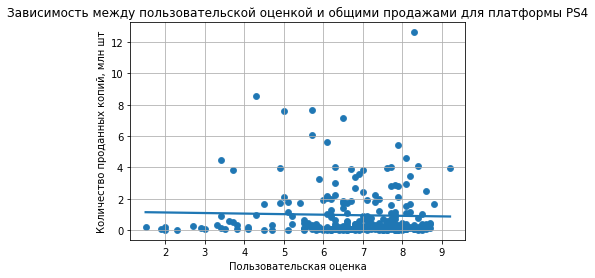

In [75]:
df_PS4 = df_platform.query('platform == "PS4" and user_score != 0')
df_PS4.plot(x='user_score', y='all_sales', kind='scatter', grid=True)
sns.regplot(x=df_PS4['user_score'], y=df_PS4['all_sales'], ci=None)
plt.xlabel('Пользовательская оценка')
plt.ylabel('Количество проданных копий, млн шт')
plt.title('Зависимость между пользовательской оценкой и общими продажами для платформы PS4')
plt.show()

In [76]:
df_PS4['user_score'].corr(df_PS4['all_sales'])

-0.03201493087451781

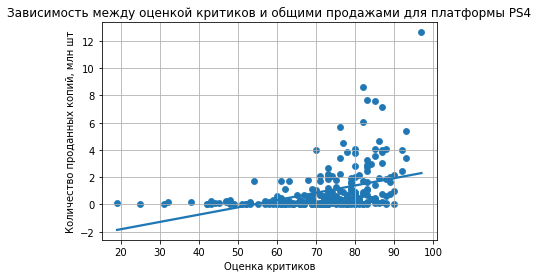

In [77]:
df_PS4 = df_platform.query('platform == "PS4" and critic_score != 0')
df_PS4.plot(x='critic_score', y='all_sales', kind='scatter', grid=True)
sns.regplot(x=df_PS4['critic_score'], y=df_PS4['all_sales'], ci=None)
plt.xlabel('Оценка критиков')
plt.ylabel('Количество проданных копий, млн шт')
plt.title('Зависимость между оценкой критиков и общими продажами для платформы PS4')
plt.show()

In [78]:
df_PS4['critic_score'].corr(df_PS4['all_sales'])

0.4065802406899803

###### 4.3.1.4.1 Вывод

* Между пользовательской оценкой и общими продажами слабая зависимость. График имеет более равномерное распределение значений по оси оценки, чем график оценки критиков.
* Между оценкой критиков и общими продажами слабая зависимость. Большинство значений собрано в правой части графика.
* Есть 1 выброс с высокими продажами, но средней пользовательской оценкой и очень высокой оценкой критиков.
* Самые продаваемые игры:
    * Call of Duty: Black Ops 3 — 14.6 млн проданных копий без оценок пользователей и критиков.
    * Grand Theft Auto V — 12.6 млн проданных копий с оценкой пользователей 8.3 и критиков 97.
    * FIFA 16 — 8.6 млн проданных копий с оценкой пользователей 4.3 и критиков 82.
    * Star Wars Battlefront (2015), Call of Duty: Advanced Warfare, FIFA 17, Fallout 4 — более 7 млн проданных копий с оценкой пользователей выше 5 и критиков выше 83.

##### 4.3.1.5 Платформа WiiU

In [79]:
df_platform.query('platform == "WiiU"').sort_values(by='all_sales', ascending=False).head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
110,Mario Kart 8,WiiU,2014,Racing,3.150391,2.150391,1.280273,0.509766,88.0,9.101562,E,7.093750
216,Super Smash Bros. for Wii U and 3DS,WiiU,2014,Fighting,2.599609,1.080078,0.810059,0.379883,0.0,0.000000,unknown,4.867188
247,Splatoon,WiiU,2015,Shooter,1.540039,1.179688,1.459961,0.260010,81.0,8.500000,E10+,4.441406
260,Super Mario 3D World,WiiU,2013,Platform,2.109375,1.160156,0.729980,0.320068,93.0,9.000000,E,4.320312
424,Super Mario Maker,WiiU,2015,Platform,1.179688,0.890137,0.939941,0.199951,88.0,8.703125,E,3.208984
719,New Super Luigi U,WiiU,2013,Platform,1.250000,0.620117,0.180054,0.180054,77.0,7.898438,E,2.230469
977,The Legend of Zelda: The Wind Waker,WiiU,2013,Action,0.919922,0.600098,0.140015,0.140015,0.0,0.000000,unknown,1.798828
1014,Wii Party U,WiiU,2013,Misc,0.300049,0.560059,0.839844,0.049988,65.0,6.800781,E,1.750000
1173,Mario Party 10,WiiU,2015,Misc,0.689941,0.529785,0.239990,0.119995,66.0,6.500000,E,1.580078
1230,Donkey Kong Country: Tropical Freeze,WiiU,2014,Platform,0.700195,0.549805,0.160034,0.119995,83.0,8.898438,E,1.530273


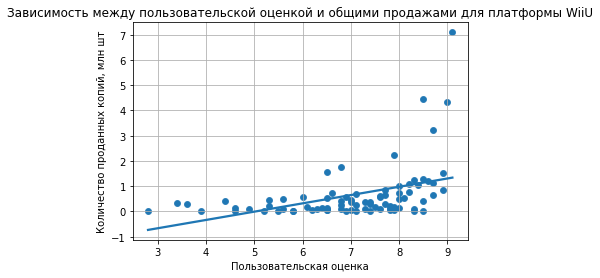

In [80]:
df_WiiU = df_platform.query('platform == "WiiU" and user_score != 0')
df_WiiU.plot(x='user_score', y='all_sales', kind='scatter', grid=True)
sns.regplot(x=df_WiiU['user_score'], y=df_WiiU['all_sales'], ci=None)
plt.xlabel('Пользовательская оценка')
plt.ylabel('Количество проданных копий, млн шт')
plt.title('Зависимость между пользовательской оценкой и общими продажами для платформы WiiU')
plt.show()

In [81]:
df_WiiU['user_score'].corr(df_WiiU['all_sales'])

0.4194244145884628

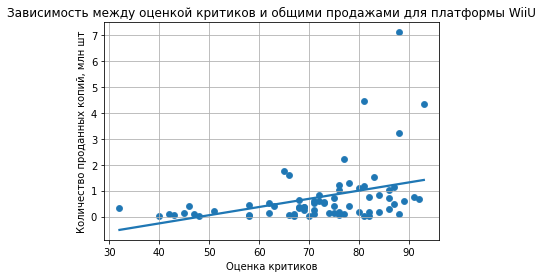

In [82]:
df_WiiU = df_platform.query('platform == "WiiU" and critic_score != 0')
df_WiiU.plot(x='critic_score', y='all_sales', kind='scatter', grid=True)
sns.regplot(x=df_WiiU['critic_score'], y=df_WiiU['all_sales'], ci=None)
plt.xlabel('Оценка критиков')
plt.ylabel('Количество проданных копий, млн шт')
plt.title('Зависимость между оценкой критиков и общими продажами для платформы WiiU')
plt.show()

In [83]:
df_WiiU['critic_score'].corr(df_WiiU['all_sales'])

0.3763517707876541

###### 4.3.1.5.1 Вывод

* Между пользовательской оценкой и общими продажами слабая зависимость. В правой части графика есть выбросы с высокими продажами и пользовательской оценкой.
* Между оценкой критиков и общими продажами слабая зависимость. Большинство значений собрано в правой части графика. Есть несколько выбросов с высокой оценкой и продажами.
* Самые продаваемые игры:
    * Mario Kart 8 — 7.1 млн проданных копий с оценкой пользователей 9.1 и критиков 88.
    * Super Smash Bros. for Wii U and 3DS — 4.9 млн проданных копий без оценок пользователей и критиков.
    * Splatoon — 4.4 млн проданных копий с оценкой пользователей 8.5 и критиков 81.
    * Super Mario 3D World — 4.3 млн проданных копий с оценкой пользователей 9 и критиков 93.

По сравнению с остальными платформами графики похожи друг на друга. Графики остальных платформ показывают большее скопление данных в правой части графика для оценки критиков, в то время как пользовательские оценки распределены более равномерно по всему графику.

##### 4.3.1.6 Платформа XOne

In [84]:
df_platform.query('platform == "XOne"').sort_values(by='all_sales', ascending=False).head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.589844,2.109375,0.010002,0.680176,0.0,0.000000,unknown,7.390625
165,Grand Theft Auto V,XOne,2014,Action,2.810547,2.189453,0.000000,0.469971,97.0,7.898438,M,5.468750
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.220703,1.549805,0.010002,0.479980,81.0,5.398438,M,5.261719
242,Halo 5: Guardians,XOne,2015,Shooter,2.779297,1.269531,0.029999,0.409912,84.0,6.398438,T,4.488281
270,Fallout 4,XOne,2015,Role-Playing,2.509766,1.320312,0.010002,0.379883,88.0,6.199219,M,4.218750
342,Star Wars Battlefront (2015),XOne,2015,Shooter,2.039062,1.280273,0.020004,0.320068,0.0,0.000000,unknown,3.660156
373,Assassin's Creed: Unity,XOne,2014,Action,2.269531,0.899902,0.000000,0.330078,72.0,4.101562,M,3.500000
398,Destiny,XOne,2014,Shooter,2.140625,0.919922,0.000000,0.310059,75.0,5.500000,T,3.371094
413,Gears of War: Ultimate Edition,XOne,2015,Shooter,2.609375,0.330078,0.000000,0.340088,82.0,7.500000,M,3.279297
417,FIFA 16,XOne,2015,Sports,0.890137,2.119141,0.000000,0.239990,84.0,4.398438,E,3.250000


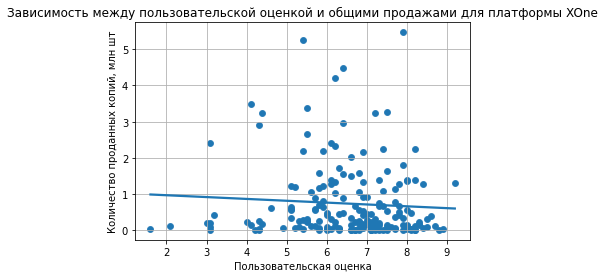

In [85]:
df_XOne = df_platform.query('platform == "XOne" and user_score != 0')
df_XOne.plot(x='user_score', y='all_sales', kind='scatter', grid=True)
sns.regplot(x=df_XOne['user_score'], y=df_XOne['all_sales'], ci=None)
plt.xlabel('Пользовательская оценка')
plt.ylabel('Количество проданных копий, млн шт')
plt.title('Зависимость между пользовательской оценкой и общими продажами для платформы XOne')
plt.show()

In [86]:
df_XOne['user_score'].corr(df_XOne['all_sales'])

-0.06907466513802794

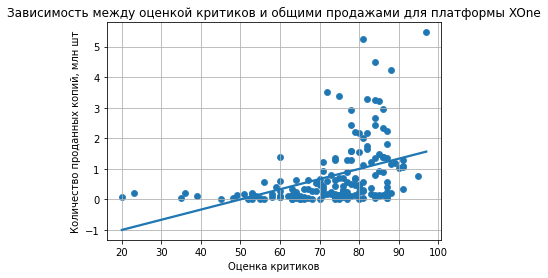

In [87]:
df_XOne = df_platform.query('platform == "XOne" and critic_score != 0')
df_XOne.plot(x='critic_score', y='all_sales', kind='scatter', grid=True)
sns.regplot(x=df_XOne['critic_score'], y=df_XOne['all_sales'], ci=None)
plt.xlabel('Оценка критиков')
plt.ylabel('Количество проданных копий, млн шт')
plt.title('Зависимость между оценкой критиков и общими продажами для платформы XOne')
plt.show()

In [88]:
df_XOne['critic_score'].corr(df_XOne['all_sales'])

0.4169738736266192

###### 4.3.1.6.1 Вывод

* Между пользовательской оценкой и общими продажами очень слабая зависимость. Большой разрос значений в правой части графика.
* Между оценкой критиков и общими продажами слабая зависимость. Большинство значений собрано в правой части графика. Есть несколько выбросов с высокой оценкой и продажами.
* Самые продаваемые игры:
    * Call of Duty: Black Ops 3 — 7.4 млн проданных копий без оценок пользователей и критиков.
    * Grand Theft Auto V — 5.5 млн проданных копий с оценкой пользователей 7.9 и критиков 97.
    * Call of Duty: Advanced Warfare — 5.3 млн проданных копий с оценкой пользователей 5.4 и критиков 81.

##### 4.3.1.7 Вывод

Анализ данных по жанрам, оценкам пользователей и критиков, а также продажам показал:
1. Низкая плотность распределения в графике распределения вероятностей для игровых платформ. Большое количество игр-выбросов с высокими продажами, которые надо изучить.
2. Платформа 3DS показывает слабую зависимость между оценками и продажами. Самая продаваемая игра Pokemon X/Pokemon Y достигает 14.6 млн проданных копий.
3. Платформа PC показывает слабую зависимость между оценками и продажами. Самая продаваемая игра The Sims 4 достигает 3 млн проданных копий.
4. Платформа PS4 показывает слабую зависимость между оценками и продажами. Самая продаваемая игра Call of Duty: Black Ops 3 достигает 14.6 млн проданных копий.
5. Платформа WiiU показывает слабую зависимость между оценками и продажами и имеет похожее распределение по обоим графикам в отличие от остальных платформ. Самая продаваемая игра Mario Kart 8 достигает 7.1 млн проданных копий.
6. Платформа XOne показывает слабую зависимость между пользовательскими оценками и продажами, и имеет среднюю зависимость между оценками критиков и продажами. Самая продаваемая игра Call of Duty: Black Ops 3 достигает 7.4 млн проданных копий.

#### 4.3.2 Жанры

In [89]:
df_genre = df_platform.pivot_table(index='genre', values='all_sales', aggfunc=['count', 'sum', 'median'])
df_genre.columns=['count', 'all_sales', 'median']
df_genre['percent_sales'] = df_genre['all_sales'] / df_genre['all_sales'].sum()
df_genre['avg_sale'] = df_genre['all_sales'] / df_genre['count']
df_genre.sort_values(by='median', ascending=False)

,count,all_sales,median,percent_sales,avg_sale
genre,,,,,
Shooter,120,164.250000,0.495117,0.227783,1.368750
Sports,110,88.562500,0.274902,0.122803,0.805114
Platform,49,33.750000,0.260010,0.046814,0.688776
Role-Playing,150,113.687500,0.189941,0.157715,0.757917
Fighting,38,25.500000,0.155029,0.035370,0.671053
Misc,93,30.812500,0.119995,0.042725,0.331317
Racing,57,30.265625,0.119995,0.041992,0.530976
Action,443,189.500000,0.110046,0.262939,0.427765
Simulation,47,19.765625,0.100037,0.027420,0.420545


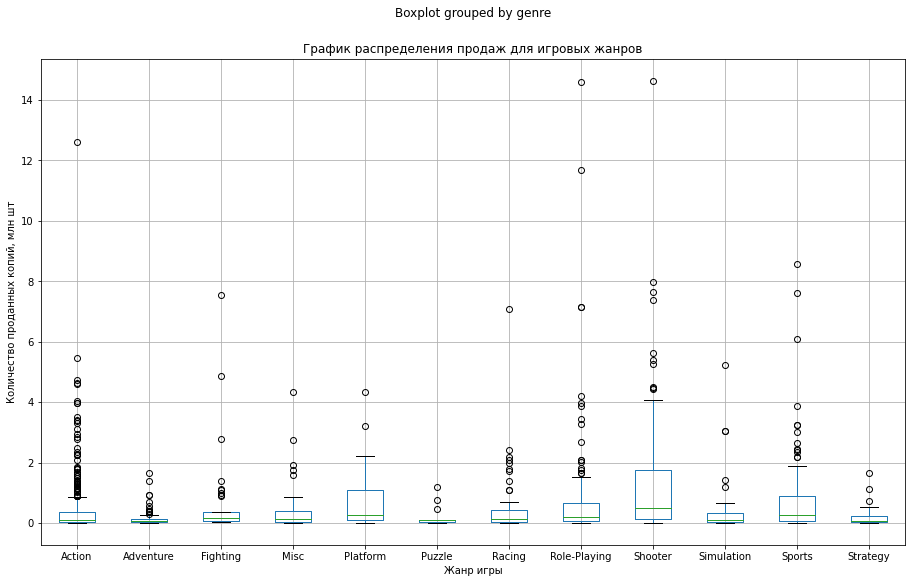

In [90]:
df_platform.boxplot(column='all_sales', by='genre', figsize=(15, 9))
plt.xlabel('Жанр игры')
plt.ylabel('Количество проданных копий, млн шт')
plt.title('График распределения продаж для игровых жанров')
plt.show()

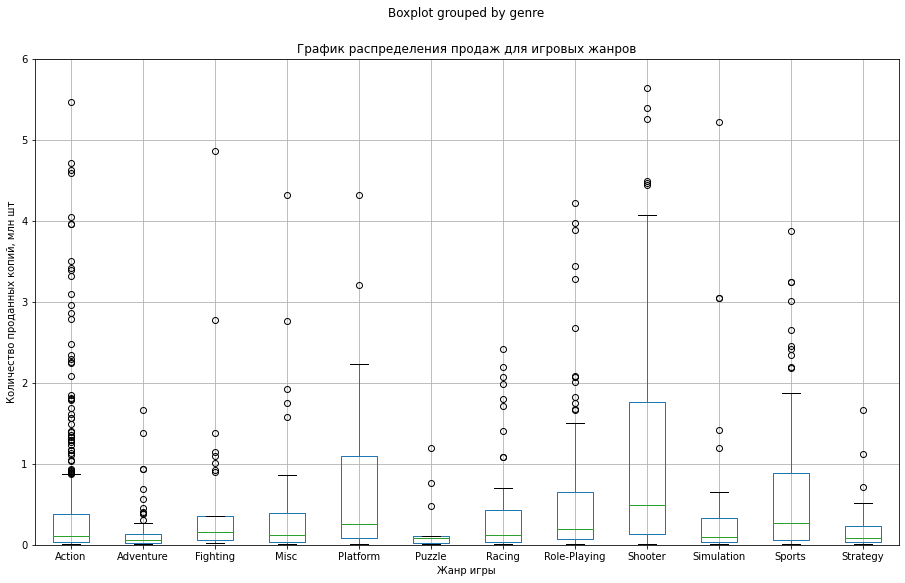

In [91]:
df_platform.boxplot(column='all_sales', by='genre', figsize=(15, 9))
plt.ylim(0, 6)
plt.xlabel('Жанр игры')
plt.ylabel('Количество проданных копий, млн шт')
plt.title('График распределения продаж для игровых жанров')
plt.show()

In [92]:
df_genre['count'].corr(df_genre['all_sales'])

0.8172888008315192

##### 4.3.2.1 Вывод

Наблюдается высокая зависимость между жанром игры и продажами. Самые популярные жанры:

    1. Shooter: медиана по продажам 0.49 млн проданных копий.
    2. Sports: медиана по продажам 0.27 млн проданных копий.
    3. Platform: медиана по продажам 0.26 млн проданных копий.
    4. Role-Playing: медиана по продажам 0.19 млн проданных копий.
    5. Fighting: медиана по продажам 0.15 млн проданных копий.

##### 4.3.2.2 Платформа 3DS

In [93]:
df_genre_3DS = df_platform.query('platform == "3DS"').pivot_table(index='genre', values='all_sales', aggfunc=['count', 'sum', 'median'])
df_genre_3DS.columns=['count', 'all_sales', 'median']
df_genre_3DS['percent_sales'] = df_genre_3DS['all_sales'] / df_genre_3DS['all_sales'].sum()
df_genre_3DS.sort_values(by='median', ascending=False)

,count,all_sales,median,percent_sales
genre,,,,
Platform,15,8.789062,0.239990,0.061340
Sports,8,1.820312,0.185059,0.012711
Role-Playing,62,67.375000,0.175049,0.470215
Puzzle,9,1.730469,0.100037,0.012077
Fighting,7,8.210938,0.080017,0.057312
Misc,32,7.101562,0.080017,0.049561
Action,116,34.031250,0.070007,0.237549
Adventure,27,3.330078,0.059998,0.023239
Shooter,1,0.059998,0.059998,0.000419


In [94]:
df_genre_3DS['count'].corr(df_genre_3DS['all_sales'])

0.7072714815317732

###### 4.3.2.2.1 Вывод

Наблюдается высокая зависимость между жанром игры и продажами. Самые популярные жанры:

    1. Platform: медиана по продажам 0.24 млн проданных копий.
    2. Sports: медиана по продажам 0.18 млн проданных копий.
    3. Role-Playing: медиана по продажам 0.17 млн проданных копий.
    4. Puzzle: медиана по продажам 0.10 млн проданных копий.
    5. Fighting: медиана по продажам 0.08 млн проданных копий.

##### 4.3.2.3 Платформа PC

In [95]:
df_genre_PC = df_platform.query('platform == "PC"').pivot_table(index='genre', values='all_sales', aggfunc=['count', 'sum', 'median'])
df_genre_PC.columns=['count', 'all_sales', 'median']
df_genre_PC['percent_sales'] = df_genre_PC['all_sales'] / df_genre_PC['all_sales'].sum()
df_genre_PC.sort_values(by='median', ascending=False)

,count,all_sales,median,percent_sales
genre,,,,
Shooter,32,9.835938,0.209961,0.249390
Strategy,20,5.031250,0.104980,0.127563
Simulation,21,8.109375,0.100037,0.205566
Role-Playing,18,4.867188,0.089966,0.123413
Action,50,7.261719,0.059998,0.184082
Sports,13,1.959961,0.059998,0.049713
Fighting,2,0.099976,0.049988,0.002535
Platform,2,0.070007,0.035004,0.001775
Adventure,11,0.510254,0.029999,0.012939


In [96]:
df_genre_PC['count'].corr(df_genre_PC['all_sales'])

0.8039756466709143

###### 4.3.2.3.1 Вывод

Наблюдается высокая зависимость между жанром игры и продажами. Самые популярные жанры:

    1. Shooter: медиана по продажам 0.21 млн проданных копий.
    2. Strategy: медиана по продажам 0.10 млн проданных копий.
    3. Simulation: медиана по продажам 0.10 млн проданных копий.
    4. Role-Playing: медиана по продажам 0.09 млн проданных копий.
    5. Action: медиана по продажам 0.06 млн проданных копий.

##### 4.3.2.4 Платформа PS4

In [97]:
df_genre_PS4 = df_platform.query('platform == "PS4"').pivot_table(index='genre', values='all_sales', aggfunc=['count', 'sum', 'median'])
df_genre_PS4.columns=['count', 'all_sales', 'median']
df_genre_PS4['percent_sales'] = df_genre_PS4['all_sales'] / df_genre_PS4['all_sales'].sum()
df_genre_PS4.sort_values(by='median', ascending=False)

,count,all_sales,median,percent_sales
genre,,,,
Shooter,41,88.562500,0.969727,0.281738
Sports,46,55.593750,0.524902,0.176880
Platform,12,7.691406,0.300049,0.024475
Racing,19,12.140625,0.230103,0.038635
Simulation,6,1.230469,0.209961,0.003914
Role-Playing,51,28.984375,0.199951,0.092224
Fighting,18,8.648438,0.170044,0.027527
Action,144,96.125000,0.155029,0.305908
Strategy,6,0.620117,0.080017,0.001974


In [98]:
df_genre_PS4['count'].corr(df_genre_PS4['all_sales'])

0.8210968256222777

###### 4.3.2.4.1 Вывод

Наблюдается высокая зависимость между жанром игры и продажами. Самые популярные жанры:

    1. Shooter: медиана по продажам 0.97 млн проданных копий.
    2. Sports: медиана по продажам 0.52 млн проданных копий.
    3. Platform: медиана по продажам 0.30 млн проданных копий.
    4. Racing: медиана по продажам 0.23 млн проданных копий.
    5. Simulation: медиана по продажам 0.21 млн проданных копий.

##### 4.3.2.5 Платформа WiiU

In [99]:
df_genre_WiiU = df_platform.query('platform == "WiiU"').pivot_table(index='genre', values='all_sales', aggfunc=['count', 'sum', 'median'])
df_genre_WiiU.columns=['count', 'all_sales', 'median']
df_genre_WiiU['percent_sales'] = df_genre_WiiU['all_sales'] / df_genre_WiiU['all_sales'].sum()
df_genre_WiiU.sort_values(by='median', ascending=False)

,count,all_sales,median,percent_sales
genre,,,,
Racing,2,7.363281,3.681641,0.113953
Strategy,2,1.219727,0.609863,0.018875
Fighting,4,6.085938,0.600098,0.094177
Platform,15,16.265625,0.579590,0.251709
Sports,5,2.458984,0.439941,0.038055
Role-Playing,5,1.929688,0.409912,0.029861
Simulation,1,0.200073,0.200073,0.003096
Misc,18,7.378906,0.189941,0.114197
Action,48,14.750000,0.140015,0.228271


In [100]:
df_genre_WiiU['count'].corr(df_genre_WiiU['all_sales'])

0.7360174232787491

###### 4.3.2.5.1 Вывод

Наблюдается высокая зависимость между жанром игры и продажами. Самые популярные жанры:

    1. Racing: медиана по продажам 3.68 млн проданных копий.
    2. Strategy: медиана по продажам 0.61 млн проданных копий.
    3. Fighting: медиана по продажам 0.60 млн проданных копий.
    4. Platform: медиана по продажам 0.58 млн проданных копий.
    5. Sports: медиана по продажам 0.44 млн проданных копий.

##### 4.3.2.6 Платформа XOne

In [101]:
df_genre_XOne = df_platform.query('platform == "XOne"').pivot_table(index='genre', values='all_sales', aggfunc=['count', 'sum', 'median'])
df_genre_XOne.columns=['count', 'all_sales', 'median']
df_genre_XOne['percent_sales'] = df_genre_XOne['all_sales'] / df_genre_XOne['all_sales'].sum()
df_genre_XOne.sort_values(by='median', ascending=False)

,count,all_sales,median,percent_sales
genre,,,,
Shooter,38,60.343750,1.093750,0.378662
Sports,38,26.734375,0.334961,0.167725
Role-Playing,14,10.546875,0.320068,0.066162
Fighting,7,2.449219,0.199951,0.015366
Racing,20,9.789062,0.185059,0.061432
Misc,19,7.429688,0.180054,0.046631
Strategy,3,0.419922,0.170044,0.002634
Platform,5,0.930176,0.160034,0.005836
Simulation,4,0.689941,0.159912,0.004330


In [102]:
df_genre_XOne['count'].corr(df_genre_XOne['all_sales'])

0.741969353143027

###### 4.3.2.6.1 Вывод

Наблюдается высокая зависимость между жанром игры и продажами. Самые популярные жанры:

    1. Shooter: медиана по продажам 1.09 млн проданных копий.
    2. Sports: медиана по продажам 0.33 млн проданных копий.
    3. Role-Playing: медиана по продажам 0.32 млн проданных копий.
    4. Fighting: медиана по продажам 0.20 млн проданных копий.
    5. Racing: медиана по продажам 0.18 млн проданных копий.

##### 4.3.2.7 Вывод

По всей выборке наблюдается высокая зависимость между жанром игры и продажами. Самые популярные жанры — **Shooter, Sports, Platform**.

* Для платформы 3DS — Platform, Sports, Role-Playing.
* Для платформы PC — Shooter, Strategy, Simulation.
* Для платформы PS4 — Shooter, Sports, Platform.
* Для платформы WiiU — Racing, Strategy, Fighting.
* Для платформы XOne — Shooter, Sports, Role-Playing.

## 5 Портрет пользователя

### 5.1 Портрет пользователя Северной Америки (NA)

#### 5.1.1 Самые популярные платформы (топ-5)

In [103]:
df_na_platform = df_platform.query('na_sales != 0').pivot_table(index='platform', values=['na_sales', 'all_sales'], aggfunc='sum').reset_index()
df_na_platform['percent_sales'] = df_na_platform['na_sales'] / df_na_platform['na_sales'].sum()
df_na_platform['all_percent_sales'] = df_na_platform['na_sales'] / df_na_platform['all_sales']
df_na_platform = df_na_platform.sort_values(by='na_sales', ascending=False)
df_na_platform.loc[(df_na_platform['na_sales'] < 11.109375), 'platform'] = 'Другие'
df_na_platform.head(5)

,platform,all_sales,na_sales,percent_sales,all_percent_sales
2,PS4,307.50000,108.750000,0.387695,0.353760
4,XOne,159.00000,93.125000,0.332031,0.585449
0,3DS,112.37500,38.218750,0.136230,0.340088
3,WiiU,63.28125,29.203125,0.104126,0.461426
1,PC,33.21875,11.109375,0.039612,0.334473


In [104]:
df_na_platform['all_percent_sales'].mean()

0.4148

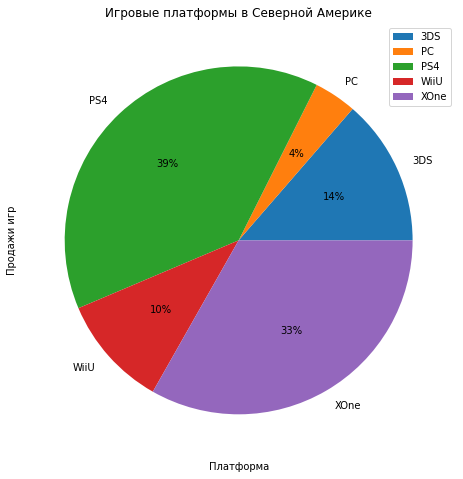

In [105]:
df_na_platform_pie = df_na_platform.pivot_table(index='platform', values='na_sales')
df_na_platform_pie.plot(y='na_sales', kind='pie', figsize=(8, 8), autopct='%1.0f%%')
plt.xlabel('Платформа')
plt.ylabel('Продажи игр')
plt.title('Игровые платформы в Северной Америке')
plt.show()

##### 5.1.1.1 Вывод
    
Самые популярные платформы (топ-5):
1. **PS4**:
    * 108.75 млн проданных копий
    * 39% от общего числа продаж в регионе
    * 36% от числа продаж игры в мире
2. **XOne**:
    * 93 млн проданных копий
    * 33% от общего числа продаж в регионе
    * 58% от числа продаж игры в мире
3. **3DS**:
    * 38 млн проданных копий
    * 14% от общего числа продаж в регионе
    * 34% от числа продаж игры в мире
4. **WiiU**:
    * 29.2 млн проданных копий
    * 10% от общего числа продаж в регионе
    * 46% от числа продаж игры в мире
5. **PC**:
    * 11.1 млн проданных копий
    * 4% от общего числа продаж в регионе
    * 33% от числа продаж игры в мире

#### 5.1.2 Самые популярные жанры (топ-5)

In [106]:
df_na_genre = df_platform.query('na_sales != 0').pivot_table(index='genre', values=['na_sales', 'all_sales'], aggfunc=['sum', 'count']).reset_index()
df_na_genre.columns = ['genre', 'all_sales',  'na_sales', 'count', 'del']
df_na_genre = df_na_genre.drop(columns='del', axis = 1)
df_na_genre['percent_sales'] = df_na_genre['na_sales'] / df_na_genre['na_sales'].sum()
df_na_genre['all_percent_sales'] = df_na_genre['na_sales'] / df_na_genre['all_sales']
df_na_genre = df_na_genre.sort_values(by='na_sales', ascending=False)
df_na_genre.loc[(df_na_genre['na_sales'] < 14.015625), 'genre'] = 'Другие'
df_na_genre.head(5)

,genre,all_sales,na_sales,count,percent_sales,all_percent_sales
8,Shooter,163.37500,74.875000,108,0.266846,0.458252
0,Action,175.00000,72.437500,292,0.258301,0.413818
10,Sports,85.43750,36.750000,79,0.130981,0.430176
7,Role-Playing,99.75000,36.343750,90,0.129517,0.364258
4,Platform,33.71875,14.015625,47,0.049957,0.415771


In [107]:
df_na_genre['all_percent_sales'].mean()

0.3992

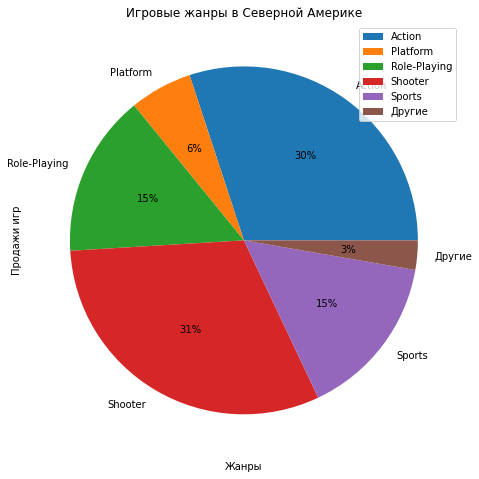

In [108]:
df_na_genre_pie = df_na_genre.pivot_table(index='genre', values='na_sales')
df_na_genre_pie.plot(y='na_sales', kind='pie', figsize=(8, 8), autopct='%1.0f%%')
plt.xlabel('Жанры')
plt.ylabel('Продажи игр')
plt.title('Игровые жанры в Северной Америке')
plt.show()

##### 5.1.2.1 Вывод

Самые популярные жанры (топ-5):
1. **Shooter**:
    * 74.9 млн проданных копий
    * 27% от общего числа продаж в регионе
    * 46% от числа продаж игры в мире
2. **Action**:
    * 72.4 млн проданных копий
    * 26% от общего числа продаж в регионе
    * 41% от числа продаж игры в мире
3. **Sports**:
    * 36.7 млн проданных копий
    * 13% от общего числа продаж в регионе
    * 43% от числа продаж игры в мире
4. **Role-Playing**:
    * 36.3 млн проданных копий
    * 13% от общего числа продаж в регионе
    * 36% от числа продаж игры в мире
5. **Platform**:
    * 14 млн проданных копий
    * 5% от общего числа продаж в регионе
    * 42% от числа продаж игры в мире

#### 5.1.3 Влияние рейтинга ESRB на продажи в регионе

In [109]:
df_na_rating = df_platform.query('rating != "unknown"').pivot_table(index='rating', values=['na_sales', 'all_sales'], aggfunc='sum').sort_values(by='na_sales', ascending=False)
df_na_rating['all_percent_sales'] = df_na_rating['na_sales'] / df_na_rating['all_sales']
df_na_rating

,all_sales,na_sales,all_percent_sales
rating,,,
M,223.6250,95.62500,0.427734
E,136.3750,51.84375,0.380127
T,83.1875,33.65625,0.404541
E10+,69.5000,31.84375,0.458252


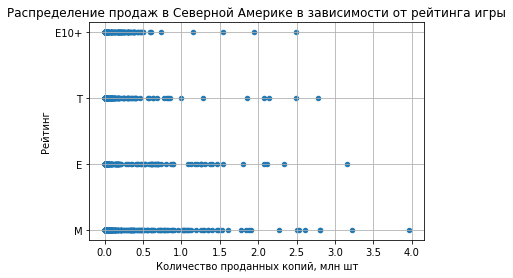

In [110]:
df_platform.query('rating != "unknown"').plot(x='na_sales', y='rating', kind='scatter', grid=True)
plt.xlabel('Количество проданных копий, млн шт')
plt.ylabel('Рейтинг')
plt.title('Распределение продаж в Северной Америке в зависимости от рейтинга игры')
plt.show()

##### 5.1.3.1 Вывод

Топ продаж в зависимости от рейтинга ESRB:
1. **M** — 95.6 млн проданных копий
2. **E** — 51.8 млн проданных копий
3. **T** — 33.7 млн проданных копий

#### 5.1.4 Игры типичного пользователя в Северной Америке

Исходя из анализа выше рассмотрим, сколько игр и сколько продаж входит в выборку пользователя "играет на платформе X360 в игру жанра Action рейтинга E".

In [111]:
df_platform.query('(na_sales != 0) and (platform == "PS4") and (genre == "Shooter") and (rating == "M")').sort_values(by='na_sales', ascending=False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.810547,3.480469,0.140015,1.230469,83.0,5.699219,M,7.660156
323,Call of Duty: Ghosts,PS4,2013,Shooter,1.780273,1.429688,0.049988,0.569824,78.0,3.699219,M,3.832031
245,Call of Duty: Infinite Warfare,PS4,2016,Shooter,1.610352,2.000000,0.150024,0.709961,77.0,3.400391,M,4.468750
325,Tom Clancy's The Division,PS4,2016,Shooter,1.349609,1.700195,0.150024,0.600098,80.0,7.000000,M,3.800781
357,Battlefield 4,PS4,2013,Shooter,1.349609,1.549805,0.170044,0.509766,85.0,6.898438,M,3.578125
298,Far Cry 4,PS4,2014,Shooter,1.129883,2.179688,0.099976,0.629883,85.0,7.699219,M,4.039062
289,Battlefield 1,PS4,2016,Shooter,1.099609,2.150391,0.209961,0.609863,88.0,8.398438,M,4.070312
560,Killzone: Shadow Fall,PS4,2013,Shooter,0.890137,1.330078,0.080017,0.389893,73.0,6.800781,M,2.691406
789,Battlefield: Hardline,PS4,2015,Shooter,0.709961,0.939941,0.140015,0.320068,73.0,5.000000,M,2.109375
1025,The Order: 1886,PS4,2015,Shooter,0.609863,0.779785,0.059998,0.270020,63.0,6.601562,M,1.718750


### 5.2 Портрет пользователя в Европе (EU)

#### 5.2.1 Самые популярные платформы (топ-5)

In [112]:
df_eu_platform = df_platform.query('eu_sales != 0').pivot_table(index='platform', values=['eu_sales', 'all_sales'], aggfunc='sum').reset_index()
df_eu_platform['percent_sales'] = df_eu_platform['eu_sales'] / df_eu_platform['eu_sales'].sum()
df_eu_platform['all_percent_sales'] = df_eu_platform['eu_sales'] / df_eu_platform['all_sales']
df_eu_platform = df_eu_platform.sort_values(by='eu_sales', ascending=False)
df_eu_platform.loc[(df_eu_platform['eu_sales'] < 19.843750), 'platform'] = 'Другие'
df_eu_platform.head(5)

,platform,all_sales,eu_sales,percent_sales,all_percent_sales
2,PS4,306.50000,141.125000,0.524414,0.460449
4,XOne,158.62500,51.593750,0.191772,0.325195
0,3DS,110.06250,30.953125,0.115051,0.281250
1,PC,39.34375,25.359375,0.094299,0.644531
3,WiiU,63.06250,19.843750,0.073792,0.314697


In [113]:
df_eu_platform['all_percent_sales'].mean()

0.405

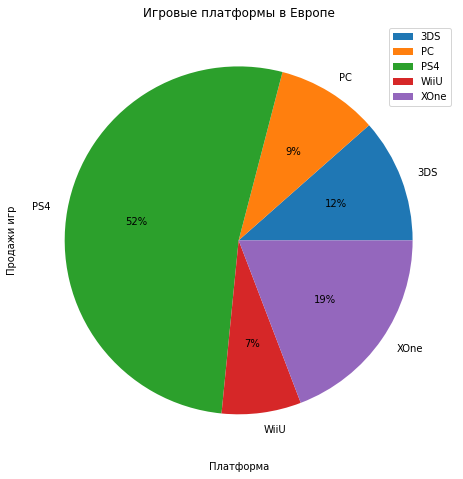

In [114]:
df_eu_platform_pie = df_eu_platform.pivot_table(index='platform', values='eu_sales')
df_eu_platform_pie.plot(y='eu_sales', kind='pie', figsize=(8, 8), autopct='%1.0f%%')
plt.xlabel('Платформа')
plt.ylabel('Продажи игр')
plt.title('Игровые платформы в Европе')
plt.show()

##### 5.2.1.1 Вывод

Самые популярные платформы (топ-5):
1. **PS4**:
    * 141.1 млн проданных копий
    * 52% от общего числа продаж в регионе
    * 46% от числа продаж игры в мире
2. **XOne**:
    * 51.6 млн проданных копий
    * 19% от общего числа продаж в регионе
    * 32% от числа продаж игры в мире
3. **3DS**:
    * 31 млн проданных копий
    * 11% от общего числа продаж в регионе
    * 28% от числа продаж игры в мире
4. **PC**:
    * 25.4 млн проданных копий
    * 9% от общего числа продаж в регионе
    * 64% от числа продаж игры в мире
5. **WiiU**:
    * 19.8 млн проданных копий
    * 7% от общего числа продаж в регионе
    * 31% от числа продаж игры в мире

#### 5.2.2 Самые популярные жанры (топ-5)

In [115]:
df_eu_genre = df_platform.query('eu_sales != 0').pivot_table(index='genre', values=['eu_sales', 'all_sales'], aggfunc=['sum', 'count']).reset_index()
df_eu_genre.columns = ['genre', 'all_sales',  'eu_sales', 'count', 'del']
df_eu_genre = df_eu_genre.drop(columns='del', axis = 1)
df_eu_genre['percent_sales'] = df_eu_genre['eu_sales'] / df_eu_genre['eu_sales'].sum()
df_eu_genre['all_percent_sales'] = df_eu_genre['eu_sales'] / df_eu_genre['all_sales']
df_eu_genre = df_eu_genre.sort_values(by='eu_sales', ascending=False)
df_eu_genre.loc[(df_eu_genre['eu_sales'] < 15.171875), 'genre'] = 'Другие'
df_eu_genre.head(5)

,genre,all_sales,eu_sales,count,percent_sales,all_percent_sales
0,Action,174.7500,72.000000,320,0.267822,0.412109
8,Shooter,163.8750,64.312500,110,0.239258,0.392334
10,Sports,86.8750,37.906250,97,0.140991,0.436279
7,Role-Playing,95.7500,30.968750,94,0.115234,0.323486
6,Racing,30.1875,15.171875,55,0.056458,0.502441


In [116]:
df_eu_genre['all_percent_sales'].mean()

0.413

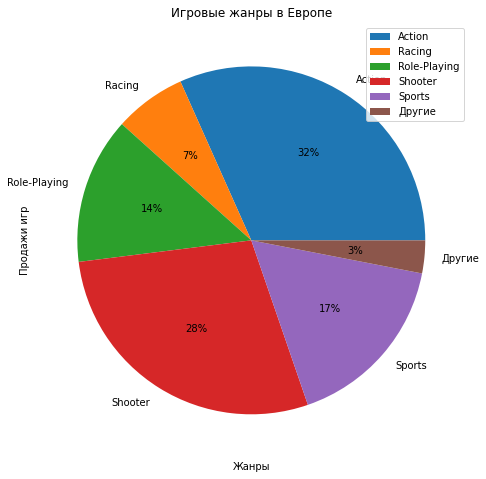

In [117]:
df_eu_genre_pie = df_eu_genre.pivot_table(index='genre', values='eu_sales')
df_eu_genre_pie.plot(y='eu_sales', kind='pie', figsize=(8, 8), autopct='%1.0f%%')
plt.xlabel('Жанры')
plt.ylabel('Продажи игр')
plt.title('Игровые жанры в Европе')
plt.show()

##### 5.2.2.1 Вывод

Самые популярные жанры (топ-5):
1. **Action**:
    * 72 млн проданных копий
    * 27% от общего числа продаж в регионе
    * 41% от числа продаж игры в мире
2. **Shooter**:
    * 64.3 млн проданных копий
    * 24% от общего числа продаж в регионе
    * 39% от числа продаж игры в мире
3. **Sports**:
    * 37.9 млн проданных копий
    * 14% от общего числа продаж в регионе
    * 46% от числа продаж игры в мире
4. **Role-Playing**:
    * 31 млн проданных копий
    * 11% от общего числа продаж в регионе
    * 32% от числа продаж игры в мире
5. **Racing**:
    * 15.2 млн проданных копий
    * 954 игр в данном жанре
    * 6% от общего числа продаж в регионе
    * 50% от числа продаж игры в мире

#### 5.2.3 Влияние рейтинга ESRB на продажи в регионе

In [118]:
df_eu_rating = df_platform.query('rating != "unknown"').pivot_table(index='rating', values=['eu_sales', 'all_sales'], aggfunc='sum').sort_values(by='eu_sales', ascending=False)
df_eu_rating['all_percent_sales'] = df_eu_rating['eu_sales'] / df_eu_rating['all_sales']
df_eu_rating

,all_sales,eu_sales,all_percent_sales
rating,,,
M,223.6250,93.375000,0.417480
E,136.3750,57.000000,0.417969
T,83.1875,31.375000,0.377197
E10+,69.5000,25.046875,0.360352


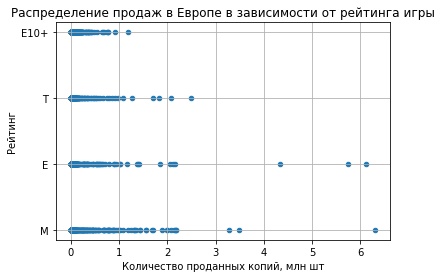

In [119]:
df_platform.query('rating != "unknown"').plot(x='eu_sales', y='rating', kind='scatter', grid=True)
plt.xlabel('Количество проданных копий, млн шт')
plt.ylabel('Рейтинг')
plt.title('Распределение продаж в Европе в зависимости от рейтинга игры')
plt.show()

##### 5.2.3.1 Вывод

Топ продаж в зависимости от рейтинга ESRB:
1. **M** — 93.4 млн проданных копий
2. **E** — 57 млн проданных копий
3. **T** — 31.4 млн проданных копий

#### 5.2.4 Игры типичного пользователя в Европе

Исходя из анализа выше рассмотрим, сколько игр и сколько продаж входит в выборку пользователя "играет на платформе PS2 в игру жанра Action рейтинга E".

In [120]:
df_platform.query('(eu_sales != 0) and (platform == "PS4") and (genre == "Action") and (rating == "M")').sort_values(by='eu_sales', ascending=False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
42,Grand Theft Auto V,PS4,2014,Action,3.960938,6.308594,0.379883,1.969727,97.0,8.296875,M,12.617188
304,Assassin's Creed: Unity,PS4,2014,Action,1.190430,2.070312,0.080017,0.620117,70.0,4.898438,M,3.960938
396,Assassin's Creed Syndicate,PS4,2015,Action,0.810059,1.990234,0.070007,0.520020,76.0,6.800781,M,3.390625
295,Watch Dogs,PS4,2014,Action,1.400391,1.900391,0.109985,0.640137,80.0,6.300781,M,4.050781
305,Batman: Arkham Knight,PS4,2015,Action,1.530273,1.690430,0.099976,0.640137,87.0,7.601562,M,3.960938
481,Middle-Earth: Shadow of Mordor,PS4,2014,Action,1.009766,1.429688,0.049988,0.469971,84.0,8.101562,M,2.960938
390,Metal Gear Solid V: The Phantom Pain,PS4,2015,Action,1.089844,1.360352,0.489990,0.479980,93.0,8.203125,M,3.419922
509,Assassin's Creed IV: Black Flag,PS4,2013,Action,1.070312,1.309570,0.059998,0.419922,83.0,7.800781,M,2.859375
707,Far Cry: Primal,PS4,2016,Action,0.600098,1.250000,0.059998,0.350098,76.0,6.300781,M,2.259766
967,Mafia III,PS4,2016,Action,0.419922,1.080078,0.029999,0.280029,68.0,5.101562,M,1.810547


### 5.3 Портрет пользователя в Японии (JP)

#### 5.3.1 Самые популярные платформы (топ-5)

In [121]:
df_jp_platform = df_platform.query('jp_sales != 0').pivot_table(index='platform', values=['jp_sales', 'all_sales'], aggfunc='sum').reset_index()
df_jp_platform['percent_sales'] = df_jp_platform['jp_sales'] / df_jp_platform['jp_sales'].sum()
df_jp_platform['all_percent_sales'] = df_jp_platform['jp_sales'] / df_jp_platform['all_sales']
df_jp_platform = df_jp_platform.sort_values(by='jp_sales', ascending=False)
df_jp_platform.loc[(df_jp_platform['jp_sales'] < 0.340088), 'platform'] = 'Другие'
df_jp_platform.head(5)

,platform,all_sales,jp_sales,percent_sales,all_percent_sales
0,3DS,136.12500,67.812500,0.713867,0.498047
1,PS4,264.75000,15.960938,0.167969,0.060272
2,WiiU,53.65625,10.882812,0.114563,0.202881
3,XOne,47.84375,0.340088,0.003580,0.007107


In [122]:
df_jp_platform['all_percent_sales'].mean()

0.192

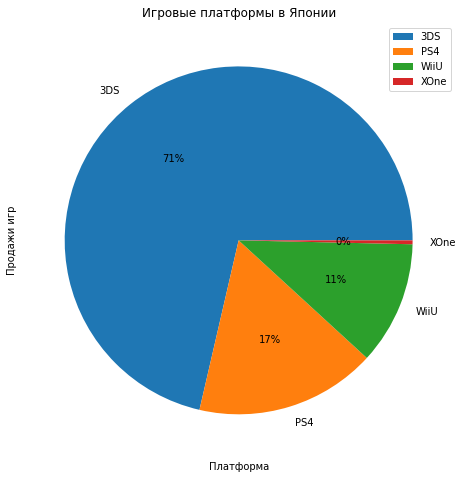

In [123]:
df_jp_platform_pie = df_jp_platform.pivot_table(index='platform', values='jp_sales')
df_jp_platform_pie.plot(y='jp_sales', kind='pie', figsize=(8, 8), autopct='%1.0f%%')
plt.xlabel('Платформа')
plt.ylabel('Продажи игр')
plt.title('Игровые платформы в Японии')
plt.show()

##### 5.3.1.1 Вывод

Самые популярные платформы (топ-5):
1. **3DS**:
    * 67.8 млн проданных копий
    * 71% от общего числа продаж в регионе
    * 50% от числа продаж игры в мире
2. **PS4**:
    * 16 млн проданных копий
    * 17% от общего числа продаж в регионе
    * 6% от числа продаж игры в мире
3. **WiiU**:
    * 10.9 млн проданных копий
    * 11% от общего числа продаж в регионе
    * 20% от числа продаж игры в мире
4. **XOne**:
    * 0.3 млн проданных копий
    * 0.4% от общего числа продаж в регионе
    * 0.7% от числа продаж игры в мире

#### 5.3.2 Самые популярные жанры (топ-5)

In [124]:
df_jp_genre = df_platform.query('jp_sales != 0').pivot_table(index='genre', values=['jp_sales', 'all_sales'], aggfunc=['sum', 'count']).reset_index()
df_jp_genre.columns = ['genre', 'all_sales',  'jp_sales', 'count', 'del']
df_jp_genre = df_jp_genre.drop(columns='del', axis = 1)
df_jp_genre['percent_sales'] = df_jp_genre['jp_sales'] / df_jp_genre['jp_sales'].sum()
df_jp_genre['all_percent_sales'] = df_jp_genre['jp_sales'] / df_jp_genre['all_sales']
df_jp_genre = df_jp_genre.sort_values(by='jp_sales', ascending=False)
df_jp_genre.loc[(df_jp_genre['jp_sales'] < 4.679688), 'genre'] = 'Другие'
df_jp_genre.head(5)

,genre,all_sales,jp_sales,count,percent_sales,all_percent_sales
7,Role-Playing,99.250000,38.000000,105,0.399902,0.382812
0,Action,128.125000,24.000000,189,0.252686,0.187378
3,Misc,17.875000,6.230469,51,0.065613,0.348633
4,Platform,28.515625,4.710938,23,0.049591,0.165161
2,Fighting,18.812500,4.679688,25,0.049255,0.248779


In [125]:
df_jp_genre['all_percent_sales'].mean()

0.263

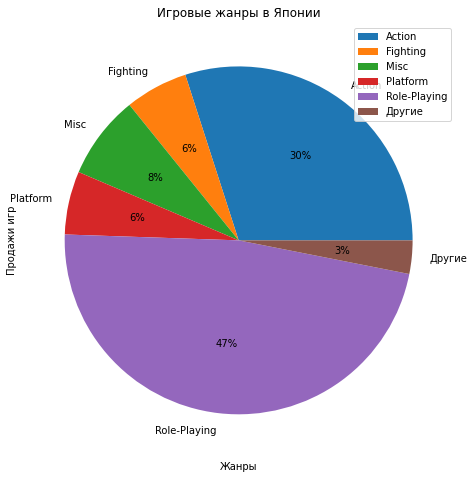

In [126]:
df_jp_genre_pie = df_jp_genre.pivot_table(index='genre', values='jp_sales')
df_jp_genre_pie.plot(y='jp_sales', kind='pie', figsize=(8, 8), autopct='%1.0f%%')
plt.xlabel('Жанры')
plt.ylabel('Продажи игр')
plt.title('Игровые жанры в Японии')
plt.show()

##### 5.3.2.1 Вывод

Самые популярные жанры (топ-5):
1. **Role-Playing**:
    * 38 млн проданных копий
    * 40% от общего числа продаж в регионе
    * 38% от числа продаж игры в мире
2. **Action**:
    * 24 млн проданных копий
    * 25% от общего числа продаж в регионе
    * 19% от числа продаж игры в мире
3. **Misc**:
    * 6.2 млн проданных копий
    * 7% от общего числа продаж в регионе
    * 3% от числа продаж игры в мире
4. **Platform**:
    * 4.7 млн проданных копий
    * 5% от общего числа продаж в регионе
    * 16% от числа продаж игры в мире
5. **Fighting**:
    * 4.7 млн проданных копий
    * 5% от общего числа продаж в регионе
    * 25% от числа продаж игры в мире

#### 5.3.3 Влияние рейтинга ESRB на продажи в регионе

In [127]:
df_jp_rating = df_platform.query('rating != "unknown"').pivot_table(index='rating', values=['jp_sales', 'all_sales'], aggfunc='sum').sort_values(by='jp_sales', ascending=False)
df_jp_rating['all_percent_sales'] = df_jp_rating['jp_sales'] / df_jp_rating['all_sales']
df_jp_rating

,all_sales,jp_sales,all_percent_sales
rating,,,
E,136.3750,13.203125,0.096802
T,83.1875,8.437500,0.101440
M,223.6250,6.750000,0.030182
E10+,69.5000,5.378906,0.077393


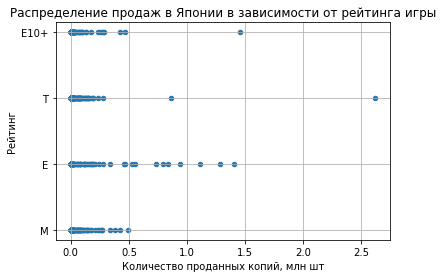

In [128]:
df_platform.query('rating != "unknown"').plot(x='jp_sales', y='rating', kind='scatter', grid=True)
plt.xlabel('Количество проданных копий, млн шт')
plt.ylabel('Рейтинг')
plt.title('Распределение продаж в Японии в зависимости от рейтинга игры')
plt.show()

##### 5.3.3.1 Вывод

Топ продаж в зависимости от рейтинга ESRB:
1. **E** — 13.2 млн проданных копий
2. **T** — 8.4 млн проданных копий
3. **M** — 6.7 млн проданных копий

#### 5.3.4 Игры типичного пользователя в Японии

Исходя из анализа выше рассмотрим, сколько игр и сколько продаж входит в выборку пользователя "играет на платформе DS в игру жанра Role-Playing рейтинга E".

In [129]:
df_platform.query('(jp_sales != 0) and (platform == "3DS") and (genre == "Role-Playing") and (rating == "E")').sort_values(by='jp_sales', ascending=False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
1595,Pokemon Super Mystery Dungeon,3DS,2015,Role-Playing,0.47998,0.350098,0.340088,0.080017,69.0,8.796875,E,1.25


### 5.4 Вывод

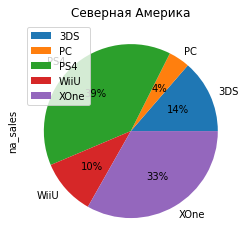

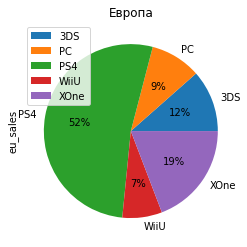

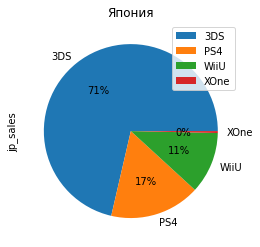

In [130]:
df_na_platform_pie.plot(y='na_sales', kind='pie', autopct='%1.0f%%', title='Северная Америка')
df_eu_platform_pie.plot(y='eu_sales', kind='pie', autopct='%1.0f%%', title='Европа')
df_jp_platform_pie.plot(y='jp_sales', kind='pie', autopct='%1.0f%%', title='Япония')
plt.show()

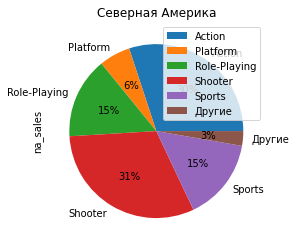

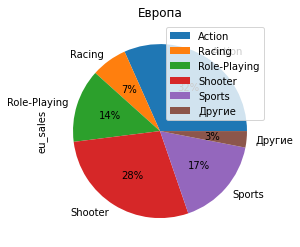

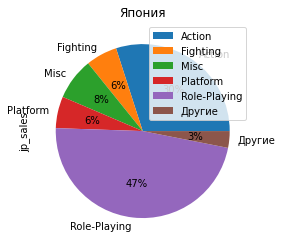

In [131]:
df_na_genre_pie.plot(y='na_sales', kind='pie', autopct='%1.0f%%', title='Северная Америка')
df_eu_genre_pie.plot(y='eu_sales', kind='pie', autopct='%1.0f%%', title='Европа')
df_jp_genre_pie.plot(y='jp_sales', kind='pie', autopct='%1.0f%%', title='Япония')
plt.show()

**Портрет пользователя Северной Америки (NA):** играет на платформе PS4 в игру жанра Shooter рейтинга M, например, в игру Call of Duty: Advanced Warfare.

Анализ платформ:
1. Самые популярные платформы (топ-5): PS4, XOne, 3DS, WiiU, PC.
2. Продажи копий для данных платформ варьируются от 11 до 109 млн.

Анализ жанров:
1. Самые популярные жанры (топ-5): Shooter, Action, Sports, Role-Playing, Platform.
2. Продажи копий для данных жанров варьируются от 14 до 75 млн.

Топ продаж в зависимости от рейтинга ESRB:
1. **M**: продажи игр составляют 43% от общемировых продаж.
2. E: продажи игр составляют 38% от общемировых продаж.
3. T: продажи игр составляют 40% от общемировых продаж.

**Портрет пользователя в Европе (EU):** играет на платформе PS4 в игру жанра Action рейтинга M, например, в игру Grand Theft Auto V.

Анализ платформ:
1. Самые популярные платформы (топ-5): PS4, XOne, 3DS, PC, WiiU.
2. Продажи копий для данных платформ варьируются от 20 до 141 млн.

Анализ жанров:
1. Самые популярные жанры (топ-5): Action, Shooter, Sports, Role-Playing, Racing.
2. Продажи копий для данных жанров варьируются от 15 до 72 млн.

Топ продаж в зависимости от рейтинга ESRB:
1. **M**: продажи игр составляют 42% от общемировых продаж.
2. E: продажи игр составляют 42% от общемировых продаж.
3. T: продажи игр составляют 38% от общемировых продаж.

**Портрет пользователя в Японии (JP):** играет на платформе DS в игру жанра Role-Playing рейтинга E, например, в игру Pokémon Platinum Version.

Анализ платформ:
1. Самые популярные платформы (топ-4): 3DS, PS4, WiiU, XOne.
2. Продажи копий для данных платформ варьируются от 0.3 до 68 млн.

Анализ жанров:
1. Самые популярные жанры (топ-5): Role-Playing, Action, Misc, Platform, Fighting.
2. Продажи копий для данных жанров варьируются от 5 до 38 млн.
    
Топ продаж в зависимости от рейтинга ESRB:
1. **E**: продажи игр составляют 10% от общемировых продаж.
2. T: продажи игр составляют 10% от общемировых продаж.
3. M: продажи игр составляют 3% от общемировых продаж.

Можно увидеть, что **в Северной Америке и Европе одинаковые предпочтения в игровых платформах**, половина игроков **предпочитают платформу PS4** (35% общемировых продаж игр этой платформы приходится на Северную Америку и 46% на Европу). Также существенная доля играет в **XOne** — 33% в Северной Америке и 19% в Европе (58% общемировых продаж игр этой платформы приходится на Северную Америку и 32% на Европу).
**В Японии же 71% игроков предпочитают 3DS** (50% от общемировых продаж игр приходится на этот регион), только 17% играет в PS4, а на XOne играют менее 1%.

Похожую картину можно увидеть при анализе популярных жанров. **Предпочтения игроков в Северной Америке идентичны предпочтениям игроков в Европе — треть играет в Shooter и треть в Action** (46% общемировых продаж игр жанра Shooter и 41% игр жанра Action приходится на Северную Америку и 41% и 40% общемировых продаж соответственно на Европу).
Другая картина **в Японии — половина играет в Role-Playing, и треть также в Action** (38% общемировых продаж игр жанра Role-Playing приходится на этот регион и только 19% на игры жанра Action).

Также нельзя однозначно сказать, влияет ли рейтинг ESRB на продажи в отдельном регионе.

## 6 Проверка гипотез

### 6.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

**H₀**: Cредние пользовательские рейтинги платформ Xbox One и PC равны.

**H₁**: Cредние пользовательские рейтинги платформ Xbox One и PC не равны.

**Пороговое значение alpha**: 0.05

In [132]:
df_platform.query('user_score != 0 and (platform == "XOne" or platform == "PC")').pivot_table(index='platform', values='user_score', aggfunc=['mean', 'median'])

,mean,median
,user_score,user_score
platform,,
PC,6.269531,6.800781
XOne,6.523438,6.800781


In [133]:
np.var(df_platform.query('platform == "XOne" and user_score != 0')['user_score'])

1.897

In [134]:
np.var(df_platform.query('platform == "PC" and user_score != 0')['user_score'])

3.016

In [135]:
results = st.stats.ttest_ind(df_platform.query('platform == "XOne" and user_score != 0')['user_score'], df_platform.query('platform == "PC" and user_score != 0')['user_score'], equal_var=False)
results

Ttest_indResult(statistic=1.4644422736060856, pvalue=0.14414956265829446)

In [136]:
alpha = .05
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу.")
else:
    print("Не получилось отвергнуть нулевую гипотезу.")

Не получилось отвергнуть нулевую гипотезу.


### 6.2 Средние пользовательские рейтинги жанров Action и Sports разные


**H₀**: Cредние пользовательские рейтинги жанров Action и Sports равны.

**H₁**: Cредние пользовательские рейтинги жанров Action и Sports не равны.

**Пороговое значение alpha**: 0.05

In [137]:
df_platform.query('user_score != 0 and (genre == "Action" or genre == "Sports")').pivot_table(index='genre', values='user_score', aggfunc=['mean', 'median'])

,mean,median
,user_score,user_score
genre,,
Action,6.820312,7.101562
Sports,5.562500,5.800781


In [138]:
np.var(df_platform.query('user_score != 0 and genre == "Action"')['user_score'])

1.742

In [139]:
np.var(df_platform.query('user_score != 0 and genre == "Sports"')['user_score'])

2.404

In [140]:
results = st.stats.ttest_ind(df_platform.query('user_score != 0 and genre == "Action"')['user_score'], df_platform.query('user_score != 0 and genre == "Sports"')['user_score'], equal_var=False)
results

Ttest_indResult(statistic=7.010041461285073, pvalue=7.623251989993283e-11)

In [141]:
alpha = .05
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу.")
else:
    print("Не получилось отвергнуть нулевую гипотезу.")

Отвергаем нулевую гипотезу.


In [142]:
df_platform['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PC'], dtype=object)

## 7 Общий вывод

Прежде чем описывать результаты анализа, отметим **общие закономерности:**
1. Резкий скачок в выпуске игр начался в 2002 году. Пик пришелся на период 2006-2011 годы.
2. Из 31 платформы только для 9 платформ продолжают выпускать игры в 2016 году.
3. Выявлена прямая связь между количеством выпущенных игр и общими продажами.

**Анализ продаж актуального периода.**
Анализ проведен по данным 5 платформ (3DS, PC, PS4, WiiU, XOne) за последние 4 года, куда вошло только 7% данных. Причина создания именно такой выборки:
* Нам не нужен анализ платформ, для которых больше не выпускают игры.
* Мы не рассматриваем период более 4 лет, так как технологии быстро развиваются, и больший период может показать нам уже устаревшие данные.

**Выводы:**
1. В основном платформы показывают отсуствие зависимости между оценками и продажами. А также разные графики зависимости между пользовательскими оценками и продажами и между оценками критиков и продажами. Можно увидеть, что для игр с высокими продажами оценка критиков скорее будет тоже высокой, в отличие от пользовательских оценок. С точки зрения рекламного развития рекомендую подробнее рассмотреть эту зависимость, так как если она подтвердится, то имеет смысл искать выходы на увеличиние количества положительных оценок критиков.
2. Наблюдается высокая зависимость между жанром игры и продажами. Самые популярные жанры: Shooter, Sports, Platform, Role-Playing и Fighting.

**Анализ портрета пользователей для разных регионов.**

1. Пользователи в Северной Америке и Европе похожи как по выбору платформ, так и по препочтениям игровых жанров. В обоих регионах половина игроков **предпочитают платформу PS4** (35% общемировых продаж игр этой платформы приходится на Северную Америку и 46% на Европу). Также существенная доля играет в **XOne** — 33% в Северной Америке и 19% в Европе (58% общемировых продаж игр этой платформы приходится на Северную Америку и 32% на Европу). Что касается жанров, **треть играет в Shooter и треть в Action** (46% общемировых продаж игр жанра Shooter и 41% игр жанра Action приходится на Северную Америку и 41% и 40% общемировых продаж соответственно на Европу).
2. **В Японии же 71% игроков предпочитают 3DS** (50% от общемировых продаж игр приходится на этот регион), только 17% играет в PS4, а на XOne играют менее 1%. Анализ жанров показал, что **половина играет в Role-Playing, и треть в Action** (38% общемировых продаж игр жанра Role-Playing приходится на этот регион и только 19% на игры жанра Action).

**Рекомендации по распределению рекламного бюджета для разных регионов:**
1. Северная Америка:
* платформы — PS4, XOne
* жанры — Shooter, Action
* рейтинг не влияет на продажи
* не стоит обращать внимание на пользовательские отзывы, но стоит обращать внимание на отзывы критиков
2. Европа
* платформы — PS4, XOne, также PC (на Европу приходится 64% от общемировых продаж)
* жанры — Action, Shooter
* рейтинг не влияет на продажи
* не стоит обращать внимание на пользовательские отзывы, но стоит обращать внимание на отзывы критиков
3. Япония
* платформы — 3DS
* жанры — Role-Playing, Action
* рейтинг не влияет на продажи
* не стоит обращать внимание на пользовательские отзывы, но стоит обращать внимание на отзывы критиков


**Проверили гипотезы и выявили:**
1. Cредние пользовательские рейтинги платформ Xbox One и PC равны.
2. Cредние пользовательские рейтинги жанров Action и Sports не равны.